In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import statsmodels.api as sm
from scipy import stats
import copy
import pickle

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../data_process/df_merged_tract_large.csv")

In [3]:
df.head()

CENSUS_ID  R_AGE_IMP  DRVRCNT  HHSIZE  HHFAMINC  HBHTNRNT  HBPPOPDN  \
0  1001020802         54        2       2      20.0       0.1       300   
1  1003010300         49        2       3     112.5       0.1        50   
2  1003010703         39        2       4     112.5       0.1       300   
3  1003011202         49        3       4      62.5       0.3      1500   
4  1003011401         69        2       2      87.5       0.2       300   

   HBRESDN  TRPMILES  TRVLCMIN  ...  TRPTRANS_2_mean_norm  \
0       50    13.430        20  ...              0.675344   
1       50    10.364         7  ...              0.675344   
2      300     6.264        12  ...              0.675344   
3     1500     3.992        15  ...             -0.044711   
4      300    10.131        30  ...              0.675344   

   TRPTRANS_3_mean_norm  TRIPPURP_0_mean_norm  TRIPPURP_1_mean_norm  \
0             -0.310812             -0.993544             -1.724233   
1             -0.310812              0.029258              1.476451   
2             -0.310812              0.793327              0.749023   
3             -0.310812              0.612922              3.133949   
4             -0.310812              0.612922              0.704858   

   TRIPPURP_2_mean_norm  TRIPPURP_3_mean_norm  TRIPPURP_4_mean_norm   density  \
0             -1.047661              0.018457              3.081432  0.000000   
1              0.047744             -1.238231             -0.390720  0.000000   
2             -1.047661              0.761045             -1.147251  0.005631   
3              0.116207             -1.238231             -2.372111  0.002344   
4             -0.465727             -0.138629             -0.687929  0.000001   

   diversity    design  
0   0.000000  0.003806  
1   0.000000  0.013154  
2   0.190895  0.111964  
3   0.999932  0.118858  
4   0.000000  0.029466  

[5 rows x 103 columns]

In [4]:
print(list(df.columns))

['CENSUS_ID', 'R_AGE_IMP', 'DRVRCNT', 'HHSIZE', 'HHFAMINC', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'TRPMILES', 'TRVLCMIN', 'HHVEHCNT_P_CAP', 'TRPTRANS_0', 'TRPTRANS_1', 'TRPTRANS_2', 'TRPTRANS_3', 'TRIPPURP_0', 'TRIPPURP_1', 'TRIPPURP_2', 'TRIPPURP_3', 'TRIPPURP_4', 'HHVEHCNT', 'R_SEX_IMP_1', 'R_SEX_IMP_2', 'EDUC_1', 'EDUC_2', 'HH_RACE_1', 'HH_RACE_2', 'HOMEOWN_0', 'HOMEOWN_1', 'HOMEOWN_2', 'HBHUR_C', 'HBHUR_R', 'HBHUR_S', 'HBHUR_T', 'HBHUR_U', 'R_AGE_IMP_mean', 'DRVRCNT_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'HBRESDN_mean', 'TRPMILES_mean', 'TRVLCMIN_mean', 'HHVEHCNT_P_CAP_mean', 'TRPTRANS_0_mean', 'TRPTRANS_1_mean', 'TRPTRANS_2_mean', 'TRPTRANS_3_mean', 'TRIPPURP_0_mean', 'TRIPPURP_1_mean', 'TRIPPURP_2_mean', 'TRIPPURP_3_mean', 'TRIPPURP_4_mean', 'HHVEHCNT_mean', 'R_SEX_IMP_1_mean', 'R_SEX_IMP_2_mean', 'EDUC_1_mean', 'EDUC_2_mean', 'HH_RACE_1_mean', 'HH_RACE_2_mean', 'HOMEOWN_0_mean', 'HOMEOWN_1_mean', 'HOMEOWN_2_mean', 'HBHUR_C_mean', 'HBHUR_R_mean', 'H

In [5]:
import os

In [6]:
model_paths = sorted(os.listdir("../models"))
regression_models = []
cnn_models = []
for elt in model_paths:
    print(elt)
    #print(elt[len(elt)-3:len(elt)])
    if elt[len(elt)-3:len(elt)] == "pth":
        cnn_models.append(elt)
    else:
        regression_models.append(elt)
print(len(regression_models))
print(len(cnn_models))

HHVEHCNT_P_CAP_mean_norm_BE (NHTS) linear.pickle
HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle
HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle
HHVEHCNT_P_CAP_mean_norm_BE linear.pickle
HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle
HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle
HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle
HHVEHCNT_P_CAP_mean_norm_SD (NHTS) linear.pickle
HHVEHCNT_mean_norm_BE (NHTS) linear.pickle
HHVEHCNT_mean_norm_BE and NHTS linear.pickle
HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle
HHVEHCNT_mean_norm_BE linear.pickle
HHVEHCNT_mean_norm_BE quadratic.pickle
HHVEHCNT_mean_norm_NHTS linear.pickle
HHVEHCNT_mean_norm_NHTS quadratic.pickle
HHVEHCNT_mean_norm_SD (NHTS) linear.pickle
TRPTRANS_1_mean_norm_BE (NHTS) linear.pickle
TRPTRANS_1_mean_norm_BE and NHTS linear.pickle
TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle
TRPTRANS_1_mean_norm_BE linear.pickle
TRPTRANS_1_mean_norm_BE quadratic.pickle
TRPTRANS_1_mean_norm_NHTS linear.pickle
TRPTRANS_1_mean_norm_NHTS

In [7]:
for model_path in model_paths:
    model = sm.load("../models/" + model_path)
    print(model)

119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356
119547037146038801333356


In [8]:
df = pd.read_csv("../data_process/df_merged_tract_large.csv")
print(df.shape)
size = 18491 #df.shape[0]

(18491, 103)


In [9]:
# read latent vectors 
import pickle
with open('../data_process/last_layer_dic_train.pickle', 'rb') as h:
    last_layer_dic_train = pickle.load(h)

with open('../data_process/last_layer_dic_test.pickle', 'rb') as h:
    last_layer_dic_test = pickle.load(h)

In [10]:
output_var_list=['HHVEHCNT_mean_norm', 'HHVEHCNT_P_CAP_mean_norm', 'TRPTRANS_1_mean_norm', 'TRPTRANS_2_mean_norm', 'TRPTRANS_3_mean_norm']
input_var=['R_AGE_IMP_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'HBRESDN_mean', 
           'R_SEX_IMP_2_mean', 'EDUC_2_mean', 'HH_RACE_2_mean', 'HOMEOWN_1_mean', 'HOMEOWN_2_mean',
           'HBHUR_R_mean', 'HBHUR_S_mean', 'HBHUR_T_mean','HBHUR_U_mean']
BE_var = ['density', 'diversity', 'design']

#SD NHTS
SD_NHTS_var = ['R_AGE_IMP_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'R_SEX_IMP_2_mean', 'EDUC_2_mean', 'HH_RACE_2_mean', 'HOMEOWN_1_mean', 'HOMEOWN_2_mean']
#BE NHTS
BE_NHTS_var = ['HBHTNRNT_mean', 'HBPPOPDN_mean', 'HBRESDN_mean', 'HBHUR_R_mean', 'HBHUR_S_mean', 'HBHUR_T_mean','HBHUR_U_mean']

input_structure_list = ['BE linear', 'BE quadratic', 'NHTS linear', 'NHTS quadratic', 'BE and NHTS linear', 'BE and NHTS quadratic', 'BE (NHTS) linear', 'SD (NHTS) linear']

In [11]:
def initialize_data_linear_reg(df, BE_NHTS_var ,BE_var, output_var, SD_NHTS_var ,input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure):
    # output: x train and test, y train and test.
    y_ = df[output_var].values 
    y = copy.deepcopy(y_)
    x = df[input_var]
    BE = df[BE_var]
    BE_NHTS = df[BE_NHTS_var]
    SD_NHTS = df[SD_NHTS_var]
    census_ids = copy.deepcopy(df["CENSUS_ID"].values)[:size]
    
    #no randomization here
    

    # train test.
    y_train = y[:size].astype("float32")
    BE_train = BE.values[:size].astype("float32")
    BE_NHTS_train = BE_NHTS.values[:size].astype("float32")
    SD_NHTS_train = SD_NHTS.values[:size].astype("float32")
    x_train = x.values[:size].astype("float32")
    # 
    cnn_vector_train=last_layer_dic_train[output_var] 
    cnn_vector_test=last_layer_dic_test[output_var]
    
    if input_structure == 'BE linear':
        x_train_ = sm.add_constant(BE_train)
        y_train_ = y_train[:]

    elif input_structure == 'BE quadratic':
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(BE_train)
        y_train_ = y_train[:]
        
    elif input_structure == 'NHTS linear':
        x_train_ = sm.add_constant(x_train)
        y_train_ = y_train[:]

    elif input_structure == 'NHTS quadratic': # I have concern about its computational problem.
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(x_train)
        y_train_ = y_train[:]
        
    elif input_structure == 'BE and NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, BE_train], axis = 1))
        y_train_ = y_train[:]
        
    elif input_structure == 'BE and NHTS quadratic': # I have concern about its computational problem. 
        poly = PolynomialFeatures(2, interaction_only = False, include_bias=True)
        x_train_ = poly.fit_transform(np.concatenate([x_train, BE_train], axis = 1))
        y_train_ = y_train[:]

    elif input_structure == 'CNN and NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, cnn_vector_train], axis = 1))
        y_train_ = y_train[:]

    elif input_structure == 'CNN BE NHTS linear':
        x_train_ = sm.add_constant(np.concatenate([x_train, BE_train, cnn_vector_train], axis = 1))
        y_train_ = y_train[:]
    elif input_structure == 'BE (NHTS) linear':
        x_train_ = sm.add_constant(BE_NHTS_train)
        y_train_ = y_train[:]
        
    elif input_structure == 'SD (NHTS) linear':
        x_train_ = sm.add_constant(SD_NHTS_train)
        y_train_ = y_train[:]

    return x_train_, y_train_, census_ids

In [12]:
for model in regression_models:
    helper = model.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)

HHVEHCNT_P_CAP_mean_norm
BE (NHTS) linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
BE linear
HHVEHCNT_P_CAP_mean_norm
BE quadratic
HHVEHCNT_P_CAP_mean_norm
NHTS linear
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
SD (NHTS) linear
HHVEHCNT_mean_norm
BE (NHTS) linear
HHVEHCNT_mean_norm
BE and NHTS linear
HHVEHCNT_mean_norm
BE and NHTS quadratic
HHVEHCNT_mean_norm
BE linear
HHVEHCNT_mean_norm
BE quadratic
HHVEHCNT_mean_norm
NHTS linear
HHVEHCNT_mean_norm
NHTS quadratic
HHVEHCNT_mean_norm
SD (NHTS) linear
TRPTRANS_1_mean_norm
BE (NHTS) linear
TRPTRANS_1_mean_norm
BE and NHTS linear
TRPTRANS_1_mean_norm
BE and NHTS quadratic
TRPTRANS_1_mean_norm
BE linear
TRPTRANS_1_mean_norm
BE quadratic
TRPTRANS_1_mean_norm
NHTS linear
TRPTRANS_1_mean_norm
NHTS quadratic
TRPTRANS_1_mean_norm
SD (NHTS) linear
TRPTRANS_2_mean_norm
BE (NHTS) linear
TRPTRANS_2_mean_norm
BE and NHTS linear
TRPTRANS_2_mean_norm
BE and

In [13]:
for model_path in regression_models:
    helper = model_path.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)
    x, y, census_ids = initialize_data_linear_reg(df, BE_NHTS_var, BE_var, output_var, SD_NHTS_var, input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure)
    
    print(census_ids.shape)
    print(x.shape)
    print(y.shape)
    
index_to_census_id = {i:id for i, id in enumerate(census_ids)}

HHVEHCNT_P_CAP_mean_norm
BE (NHTS) linear
(18491,)
(18491, 8)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
(18491,)
(18491, 19)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
(18491,)
(18491, 190)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE linear
(18491,)
(18491, 4)
(18491,)
HHVEHCNT_P_CAP_mean_norm
BE quadratic
(18491,)
(18491, 10)
(18491,)
HHVEHCNT_P_CAP_mean_norm
NHTS linear
(18491,)
(18491, 16)
(18491,)
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
(18491,)
(18491, 136)
(18491,)
HHVEHCNT_P_CAP_mean_norm
SD (NHTS) linear
(18491,)
(18491, 9)
(18491,)
HHVEHCNT_mean_norm
BE (NHTS) linear
(18491,)
(18491, 8)
(18491,)
HHVEHCNT_mean_norm
BE and NHTS linear
(18491,)
(18491, 19)
(18491,)
HHVEHCNT_mean_norm
BE and NHTS quadratic
(18491,)
(18491, 190)
(18491,)
HHVEHCNT_mean_norm
BE linear
(18491,)
(18491, 4)
(18491,)
HHVEHCNT_mean_norm
BE quadratic
(18491,)
(18491, 10)
(18491,)
HHVEHCNT_mean_norm
NHTS linear
(18491,)
(18491, 16)
(18491,)
HHVEHCNT_mean_norm
NHTS quadratic
(18491,)
(18491,

In [14]:
index_to_census_id

{0: 1001020802,
 1: 1003010300,
 2: 1003010703,
 3: 1003011202,
 4: 1003011401,
 5: 1003011502,
 6: 1003011602,
 7: 1015001700,
 8: 1031011202,
 9: 1043965500,
 10: 1047956300,
 11: 1049960500,
 12: 1053969900,
 13: 1055011001,
 14: 1059973000,
 15: 1069041900,
 16: 1073004701,
 17: 1073004800,
 18: 1073005000,
 19: 1073005903,
 20: 1073011001,
 21: 1073012905,
 22: 1073012911,
 23: 1073014204,
 24: 1073014413,
 25: 1075030200,
 26: 1077010400,
 27: 1077011604,
 28: 1079979800,
 29: 1081040400,
 30: 1081041700,
 31: 1089000601,
 32: 1089001200,
 33: 1089002600,
 34: 1089010901,
 35: 1091973000,
 36: 1093964700,
 37: 1097003704,
 38: 1097003708,
 39: 1097006301,
 40: 1101005604,
 41: 1103005101,
 42: 1109189000,
 43: 1115040104,
 44: 1115040105,
 45: 1115040501,
 46: 1115040502,
 47: 1117030214,
 48: 1117030216,
 49: 1117030304,
 50: 1117030502,
 51: 1117030605,
 52: 1125012000,
 53: 1125012600,
 54: 1133965800,
 55: 2020000102,
 56: 2020000202,
 57: 2020000203,
 58: 2020000204,
 59: 20

In [15]:
model_summaries = []
plots = []

In [16]:
for model_path in regression_models:
    helper = model_path.split("_")
    output_var = "_".join(helper[:-1])
    input_structure = helper[-1].split(".")[0]
    print(output_var)
    print(input_structure)
    x, y, census_ids = initialize_data_linear_reg(df, BE_NHTS_var, BE_var, output_var, SD_NHTS_var, input_var, last_layer_dic_train, last_layer_dic_test, size, input_structure)
    
    
    with open('../models/' + model_path, 'rb') as h:
        model = pickle.load(h)
    print(model)
        
    y_predicted = model.predict(x)
    epsilons = y - y_predicted
    original_indices, epsilons_sorted = zip(*sorted(list(zip(np.arange(epsilons.shape[0]), epsilons)), key = lambda x: x[1]))
    
    model_summaries.append((model_path, model.summary()))
    plots.append((model_path, original_indices, epsilons_sorted, y.tolist(), y_predicted.tolist()))
    

HHVEHCNT_P_CAP_mean_norm
BE (NHTS) linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS linear
HHVEHCNT_P_CAP_mean_norm
BE and NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
BE linear
HHVEHCNT_P_CAP_mean_norm
BE quadratic
HHVEHCNT_P_CAP_mean_norm
NHTS linear
HHVEHCNT_P_CAP_mean_norm
NHTS quadratic
HHVEHCNT_P_CAP_mean_norm
SD (NHTS) linear
HHVEHCNT_mean_norm
BE (NHTS) linear
HHVEHCNT_mean_norm
BE and NHTS linear
HHVEHCNT_mean_norm
BE and NHTS quadratic
HHVEHCNT_mean_norm
BE linear
HHVEHCNT_mean_norm
BE quadratic
HHVEHCNT_mean_norm
NHTS linear
HHVEHCNT_mean_norm
NHTS quadratic
HHVEHCNT_mean_norm
SD (NHTS) linear
TRPTRANS_1_mean_norm
BE (NHTS) linear
TRPTRANS_1_mean_norm
BE and NHTS linear
TRPTRANS_1_mean_norm
BE and NHTS quadratic
TRPTRANS_1_mean_norm
BE linear
TRPTRANS_1_mean_norm
BE quadratic
TRPTRANS_1_mean_norm
NHTS linear
TRPTRANS_1_mean_norm
NHTS quadratic
TRPTRANS_1_mean_norm
SD (NHTS) linear
TRPTRANS_2_mean_norm
BE (NHTS) linear
TRPTRANS_2_mean_norm
BE and NHTS linear
TRPTRANS_2_mean_norm
BE and

In [17]:
with open('../outputs/model_summaries.pickle', 'wb') as h:
    pickle.dump(model_summaries, h, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
with open('../outputs/epsilon_plots.pickle', 'wb') as h:
    pickle.dump(plots, h, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
with open('../outputs/index_to_census_id_plotting.pickle', 'wb') as h:
    pickle.dump(index_to_census_id, h, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
percentile0_25_census_id_list = []
percentile75_100_census_id_list = []

HHVEHCNT_P_CAP_mean_norm_BE (NHTS) linear.pickle


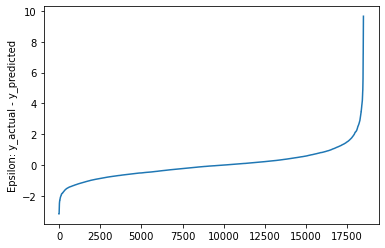

HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle


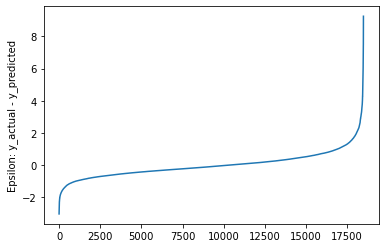

HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle


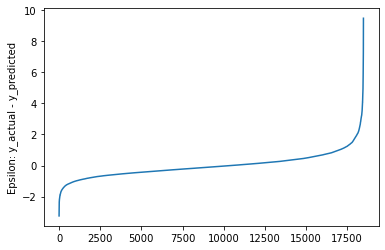

HHVEHCNT_P_CAP_mean_norm_BE linear.pickle


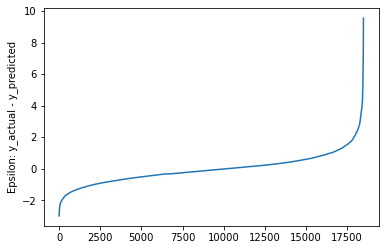

HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle


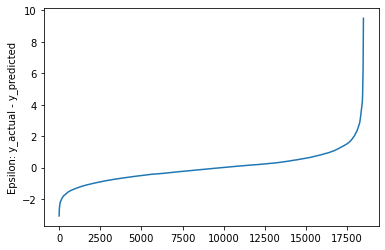

HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle


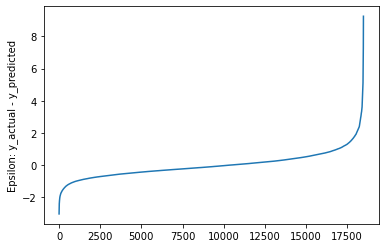

HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle


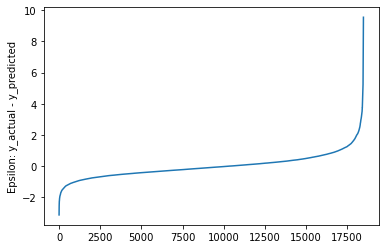

HHVEHCNT_P_CAP_mean_norm_SD (NHTS) linear.pickle


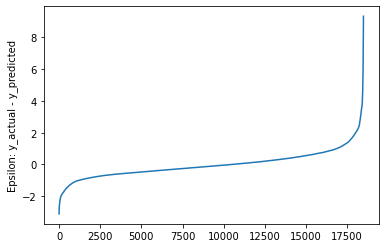

HHVEHCNT_mean_norm_BE (NHTS) linear.pickle


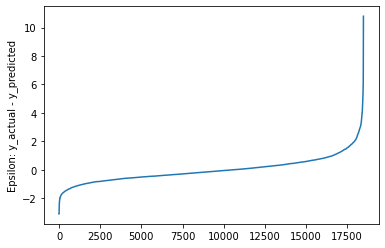

HHVEHCNT_mean_norm_BE and NHTS linear.pickle


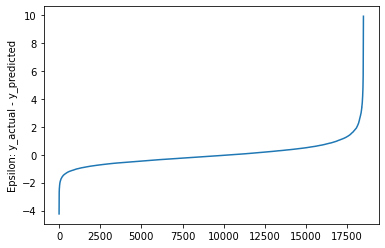

HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle


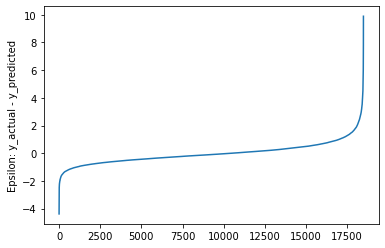

HHVEHCNT_mean_norm_BE linear.pickle


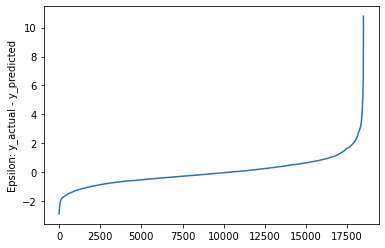

HHVEHCNT_mean_norm_BE quadratic.pickle


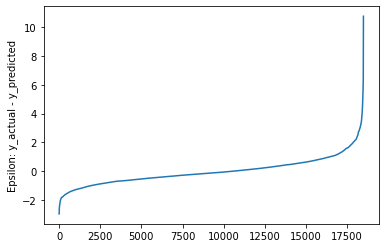

HHVEHCNT_mean_norm_NHTS linear.pickle


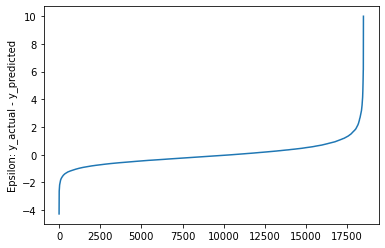

HHVEHCNT_mean_norm_NHTS quadratic.pickle


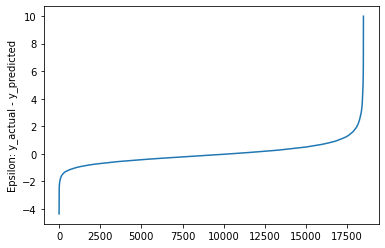

HHVEHCNT_mean_norm_SD (NHTS) linear.pickle


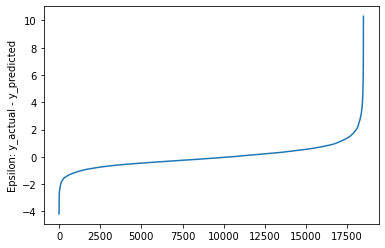

TRPTRANS_1_mean_norm_BE (NHTS) linear.pickle


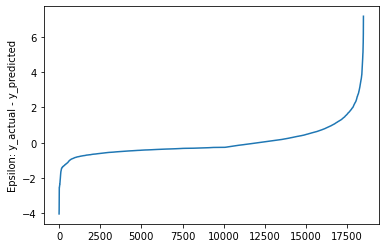

TRPTRANS_1_mean_norm_BE and NHTS linear.pickle


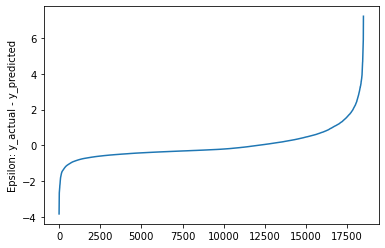

TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle


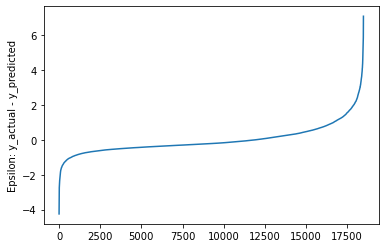

TRPTRANS_1_mean_norm_BE linear.pickle


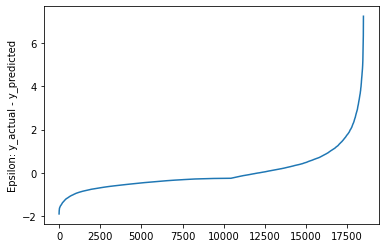

TRPTRANS_1_mean_norm_BE quadratic.pickle


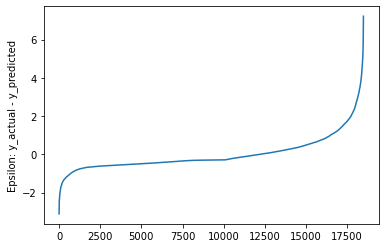

TRPTRANS_1_mean_norm_NHTS linear.pickle


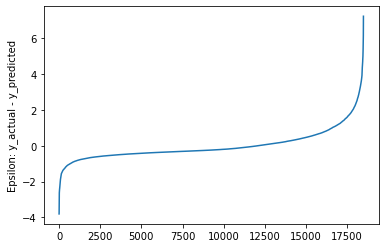

TRPTRANS_1_mean_norm_NHTS quadratic.pickle


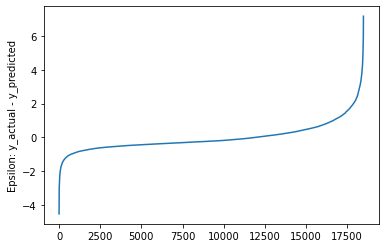

TRPTRANS_1_mean_norm_SD (NHTS) linear.pickle


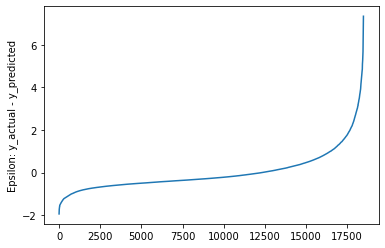

TRPTRANS_2_mean_norm_BE (NHTS) linear.pickle


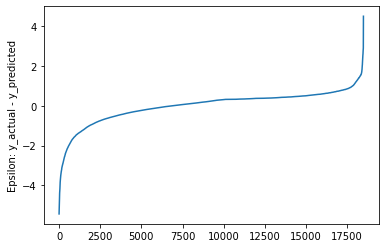

TRPTRANS_2_mean_norm_BE and NHTS linear.pickle


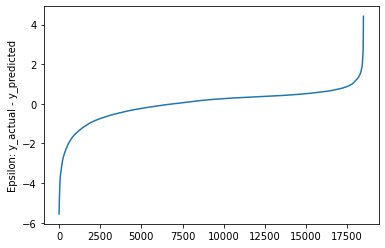

TRPTRANS_2_mean_norm_BE and NHTS quadratic.pickle


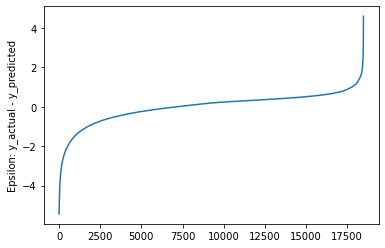

TRPTRANS_2_mean_norm_BE linear.pickle


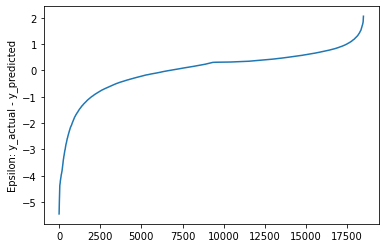

TRPTRANS_2_mean_norm_BE quadratic.pickle


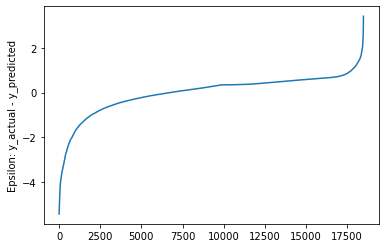

TRPTRANS_2_mean_norm_NHTS linear.pickle


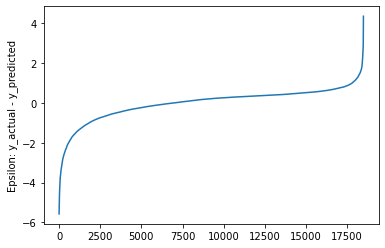

TRPTRANS_2_mean_norm_NHTS quadratic.pickle


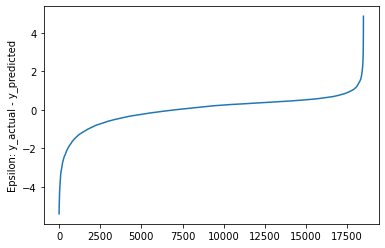

TRPTRANS_2_mean_norm_SD (NHTS) linear.pickle


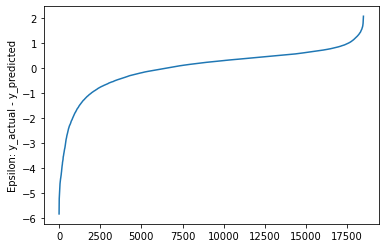

TRPTRANS_3_mean_norm_BE (NHTS) linear.pickle


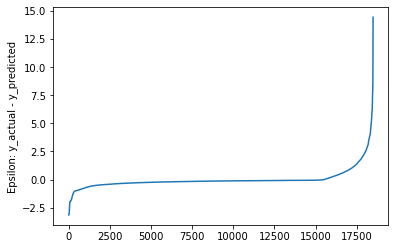

TRPTRANS_3_mean_norm_BE and NHTS linear.pickle


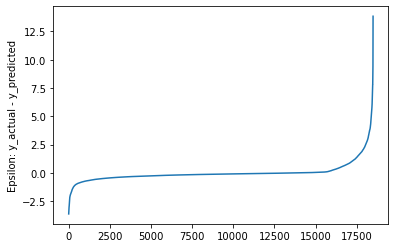

TRPTRANS_3_mean_norm_BE and NHTS quadratic.pickle


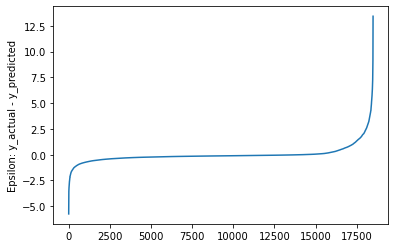

TRPTRANS_3_mean_norm_BE linear.pickle


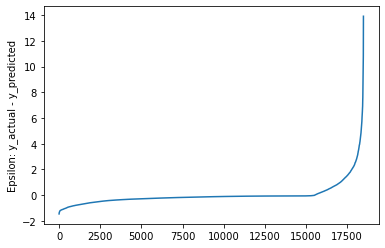

TRPTRANS_3_mean_norm_BE quadratic.pickle


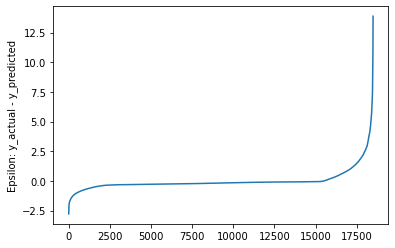

TRPTRANS_3_mean_norm_NHTS linear.pickle


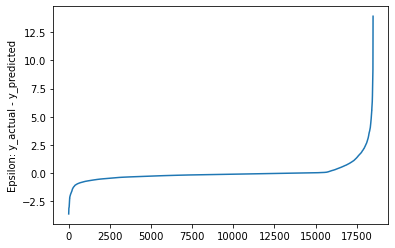

TRPTRANS_3_mean_norm_NHTS quadratic.pickle


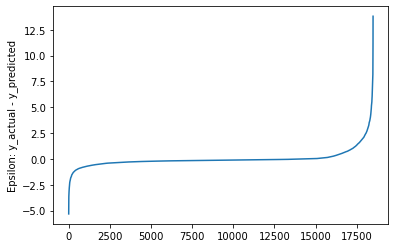

TRPTRANS_3_mean_norm_SD (NHTS) linear.pickle


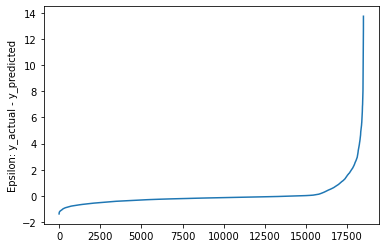

In [21]:
for plot in plots:
    model_path, original_indices, epsilons_sorted, y, y_predicted = plot
    print(model_path)
    plt.clf()
    plt.plot(epsilons_sorted)
    plt.ylabel("Epsilon: y_actual - y_predicted")
    plt.show()
    n = len(epsilons_sorted)
    percentile0_25 = original_indices[:n//4]
    percentile75_100 = original_indices[(3*n)//4:]
    
    percentile0_25_census_ids = [index_to_census_id[i] for i in percentile0_25]
    percentile75_100_census_ids = [index_to_census_id[i] for i in percentile75_100]
    percentile0_25_census_id_list.append((model_path, percentile0_25_census_ids))
    percentile75_100_census_id_list.append((model_path,percentile75_100_census_ids))
    

In [22]:
with open('../outputs/percentile0_25_census_id_list.pickle', 'wb') as h:
    pickle.dump(percentile0_25_census_id_list, h, protocol=pickle.HIGHEST_PROTOCOL)

with open('../outputs/percentile75_100_census_id_list.pickle', 'wb') as h:
    pickle.dump(percentile75_100_census_id_list, h, protocol=pickle.HIGHEST_PROTOCOL)

    
    

HHVEHCNT_P_CAP_mean_norm_BE (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

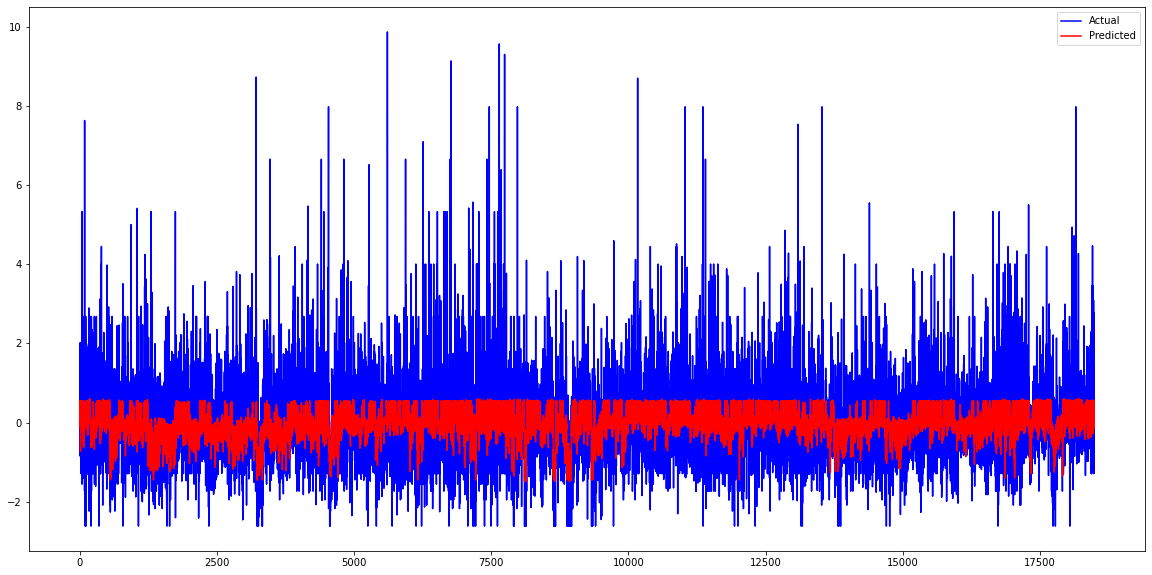

HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

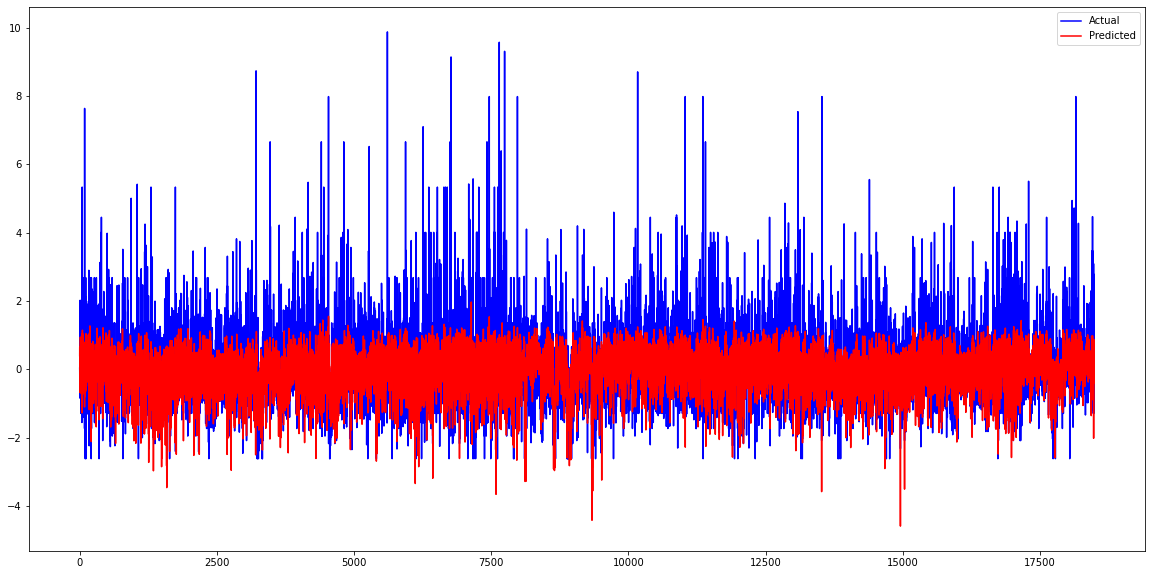

HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

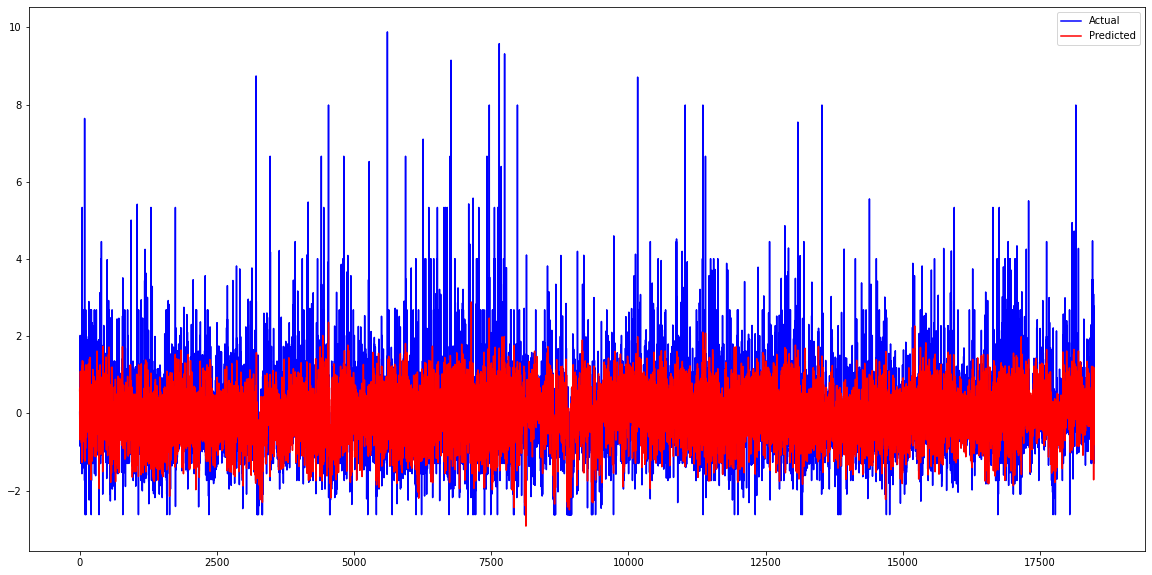

HHVEHCNT_P_CAP_mean_norm_BE linear.pickle


<Figure size 432x288 with 0 Axes>

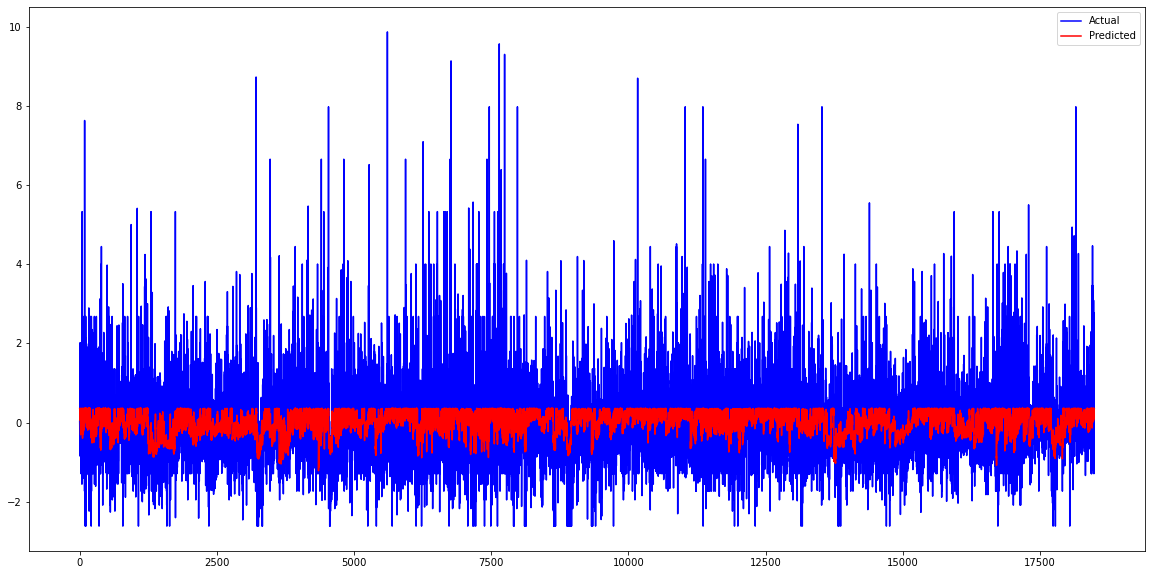

HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle


<Figure size 432x288 with 0 Axes>

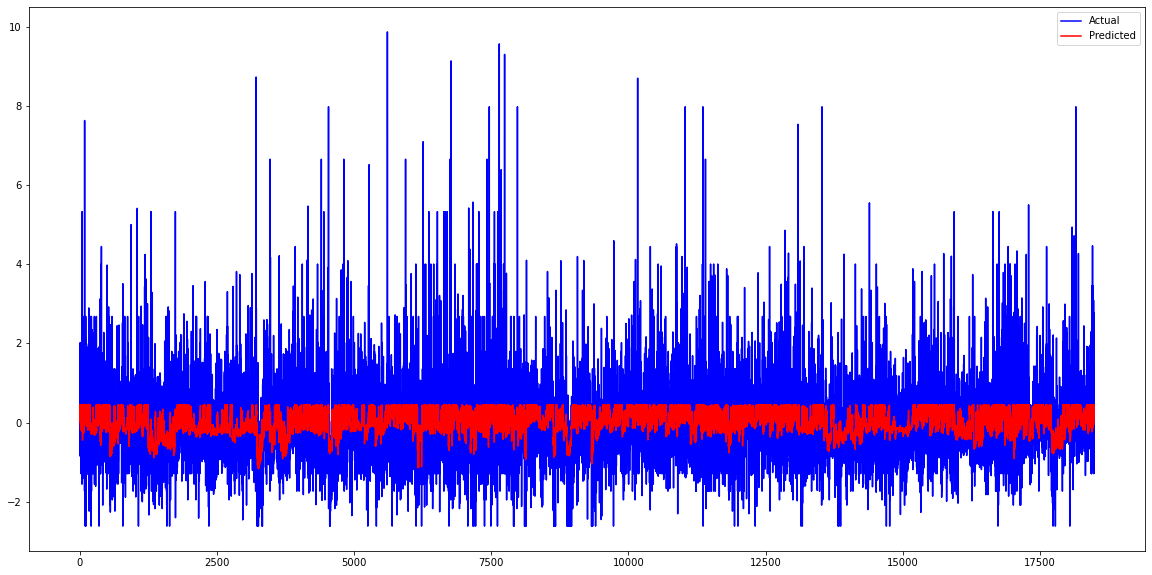

HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

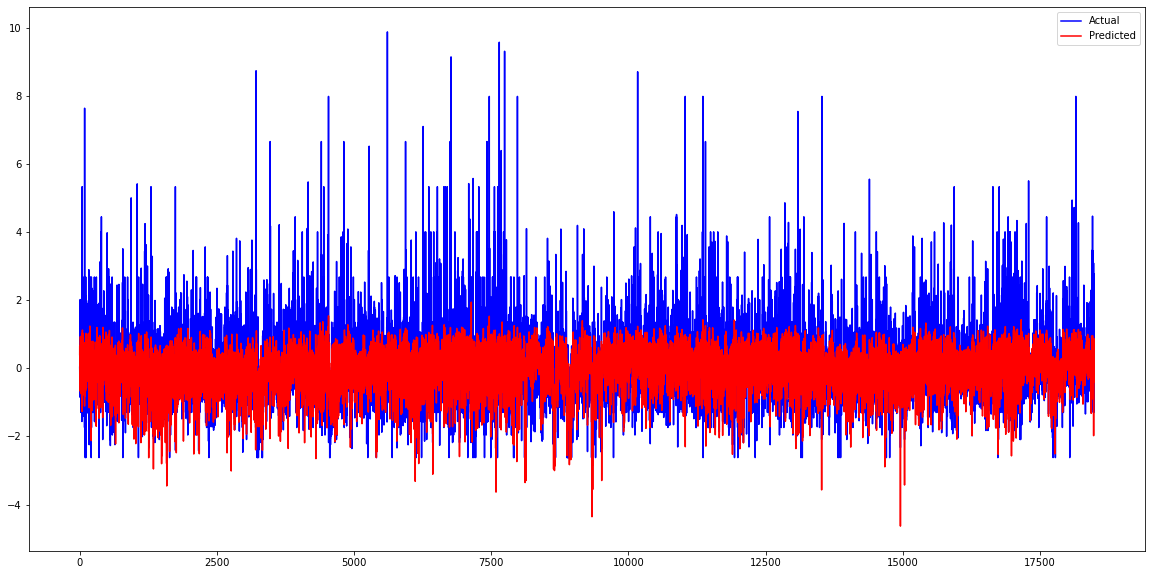

HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

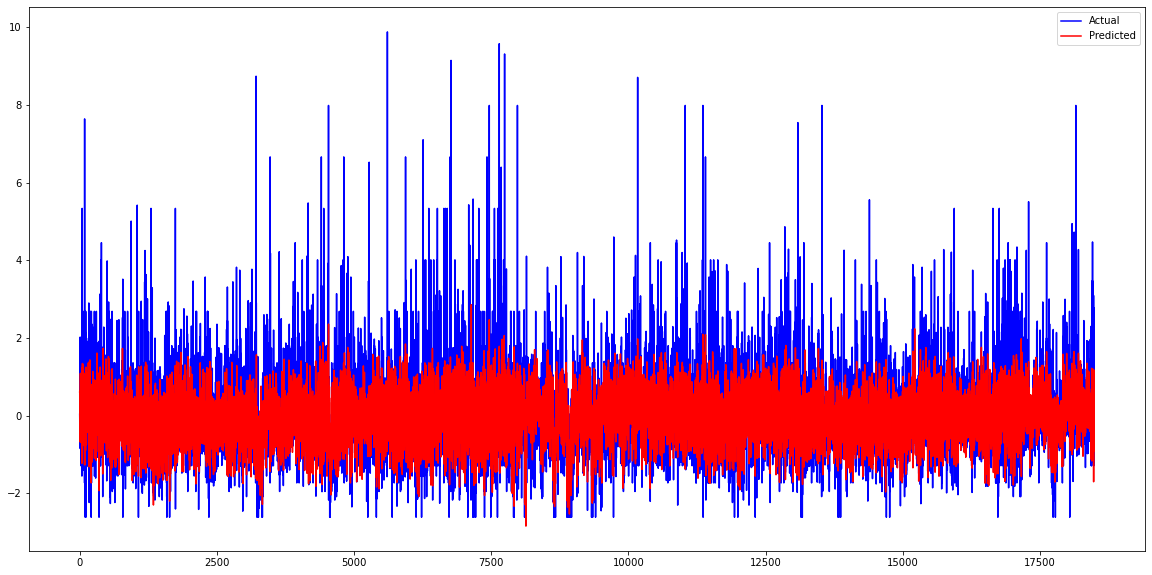

HHVEHCNT_P_CAP_mean_norm_SD (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

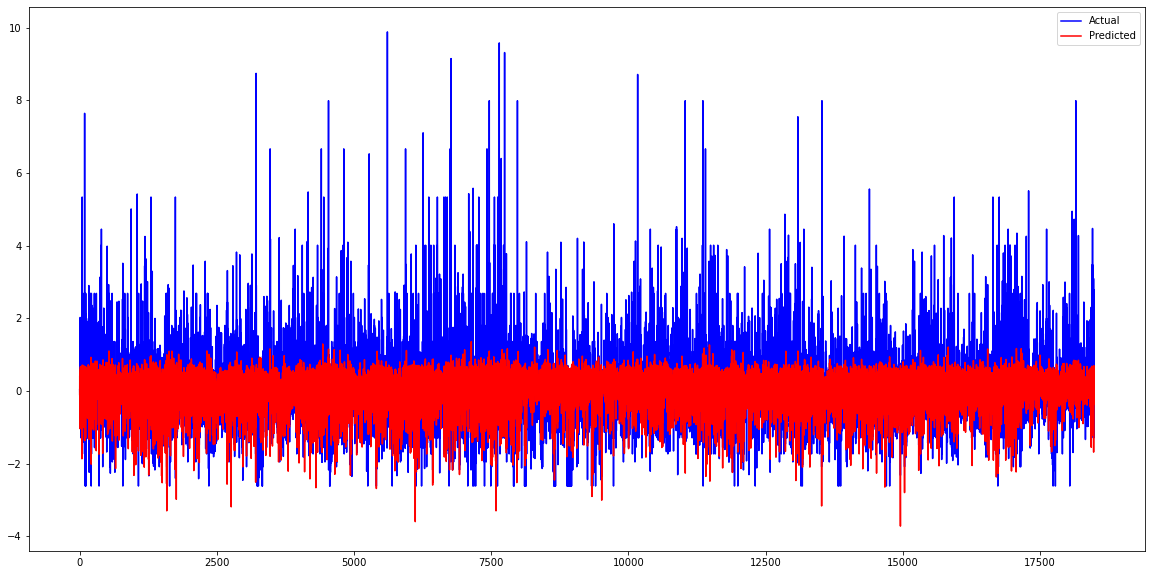

HHVEHCNT_mean_norm_BE (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

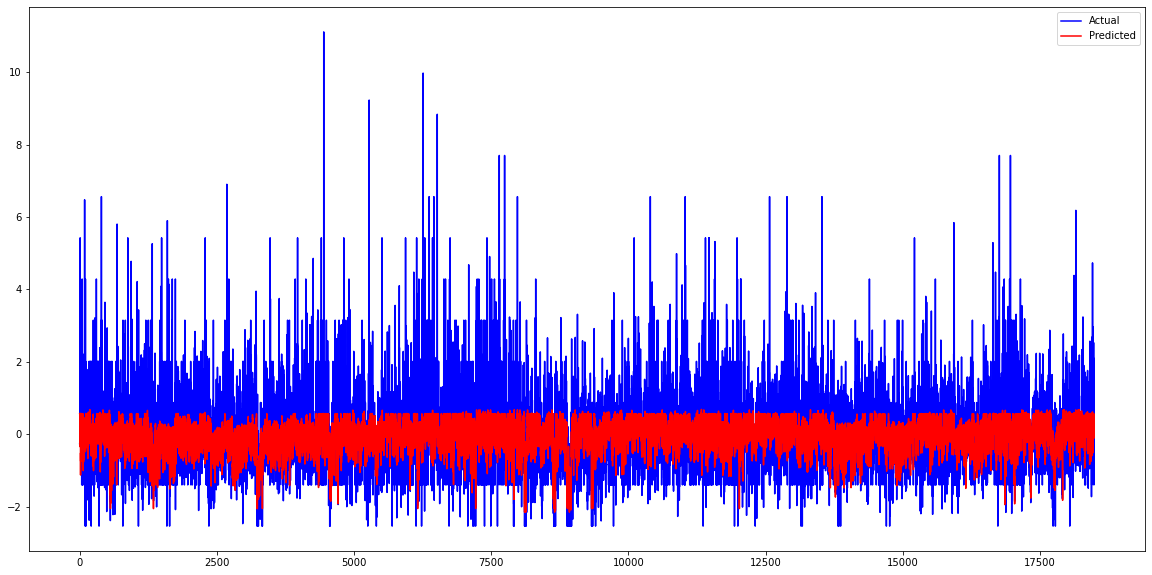

HHVEHCNT_mean_norm_BE and NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

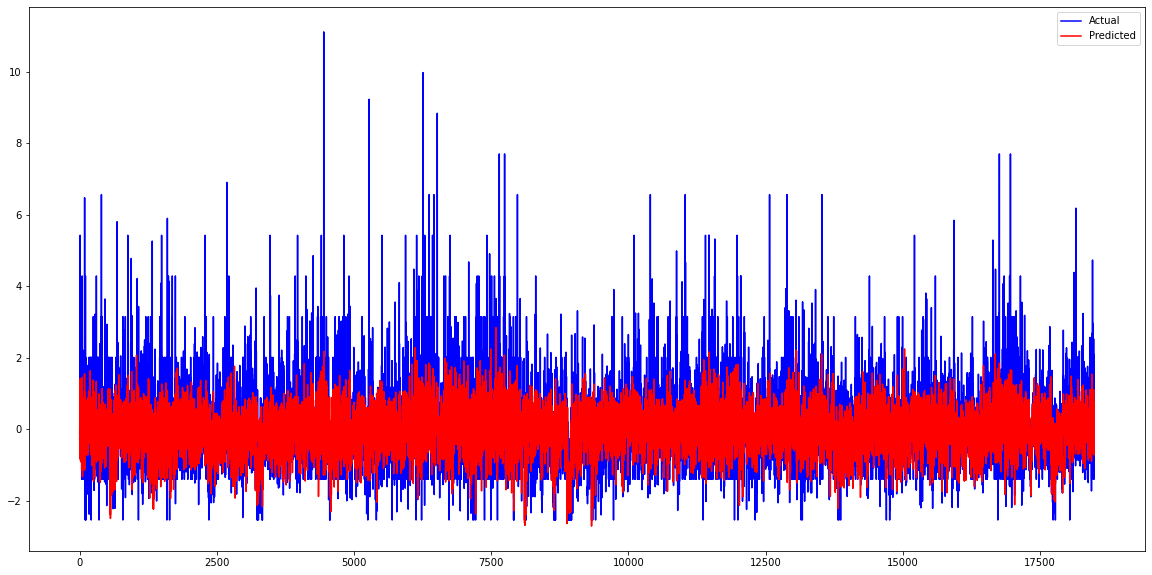

HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

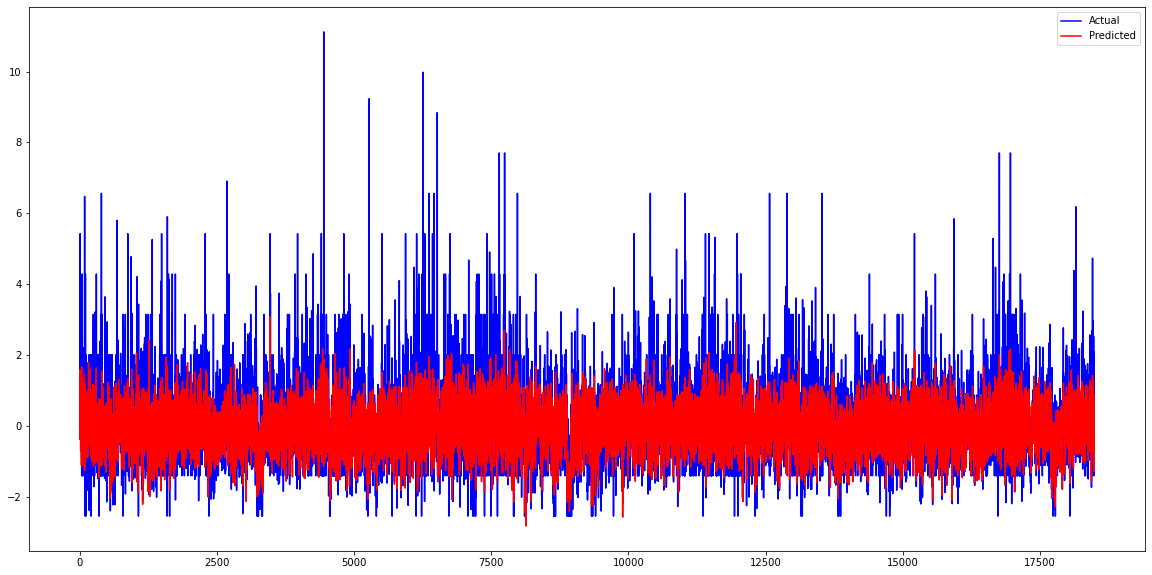

HHVEHCNT_mean_norm_BE linear.pickle


<Figure size 432x288 with 0 Axes>

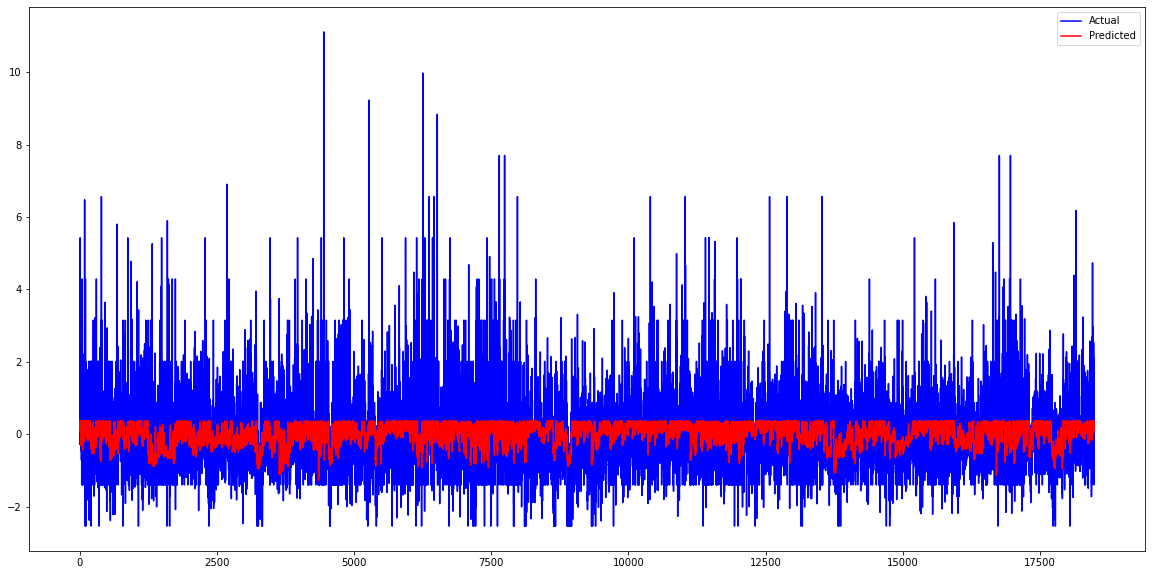

HHVEHCNT_mean_norm_BE quadratic.pickle


<Figure size 432x288 with 0 Axes>

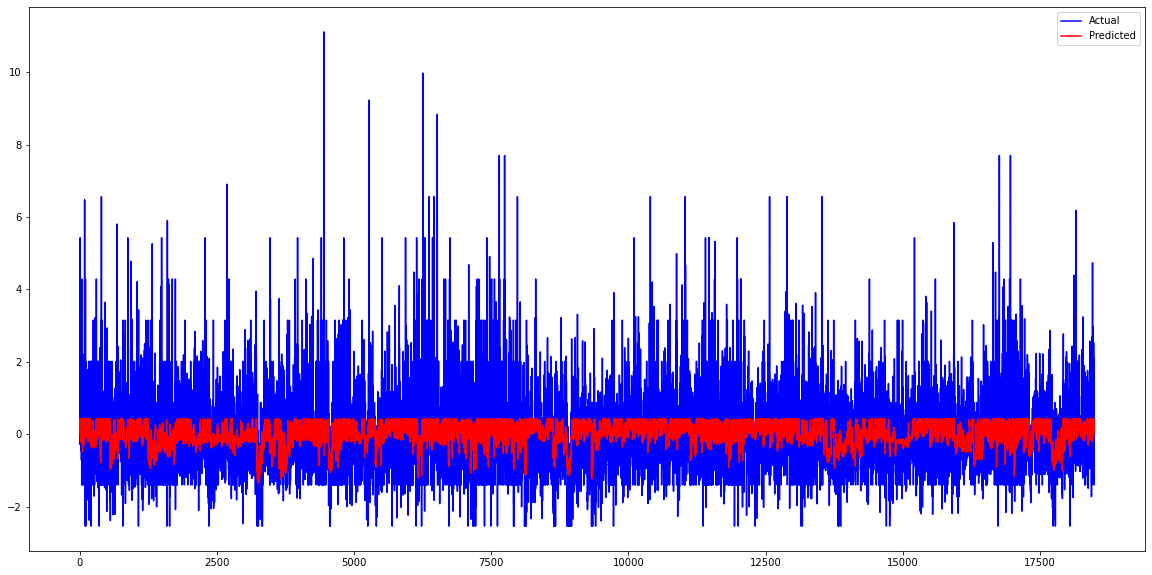

HHVEHCNT_mean_norm_NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

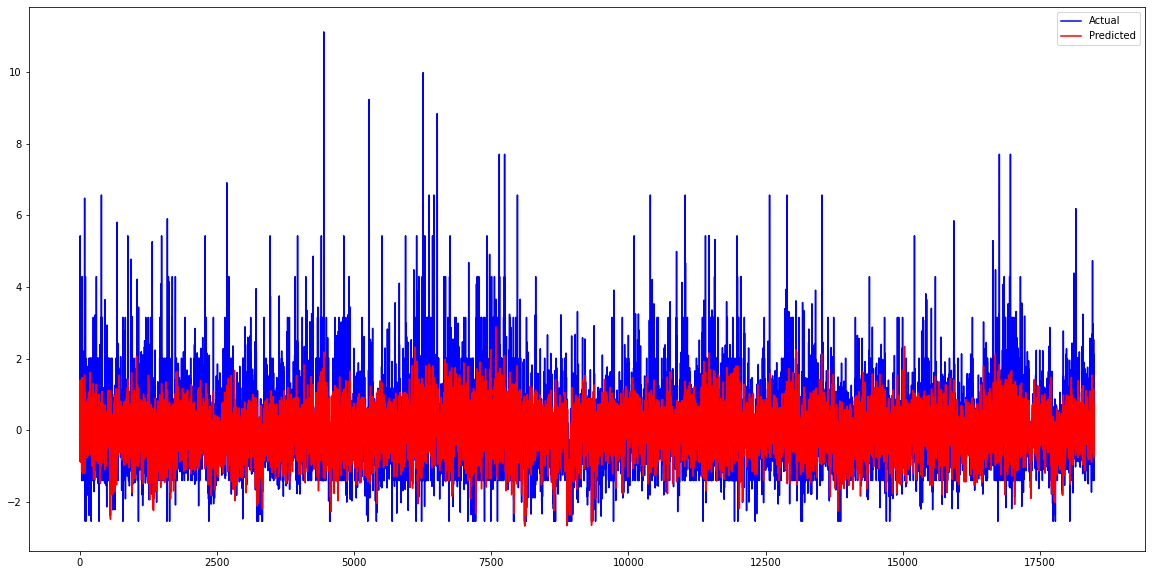

HHVEHCNT_mean_norm_NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

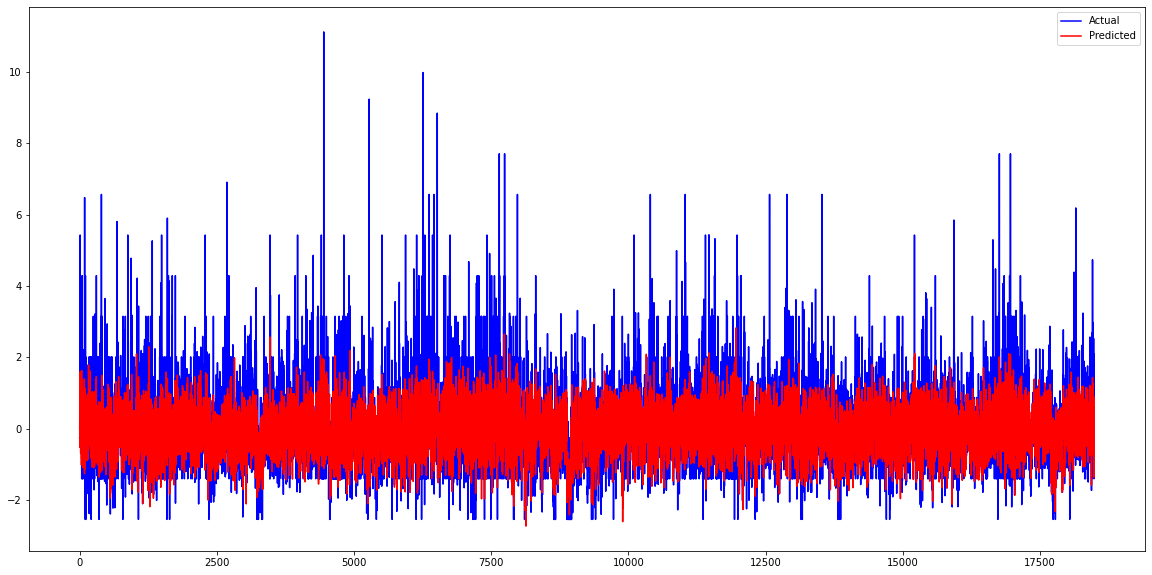

HHVEHCNT_mean_norm_SD (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

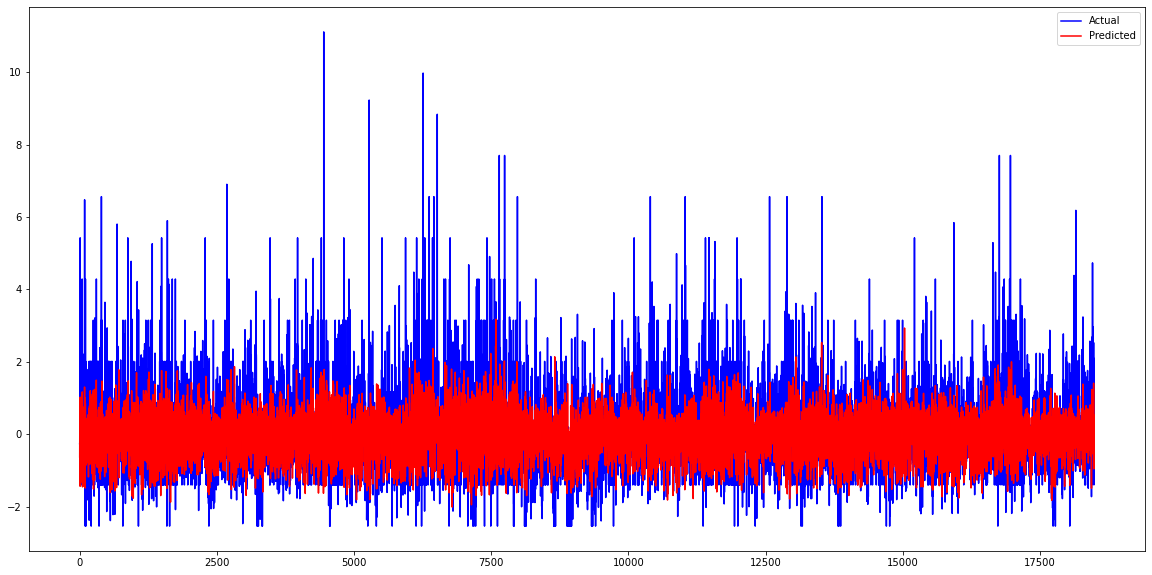

TRPTRANS_1_mean_norm_BE (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

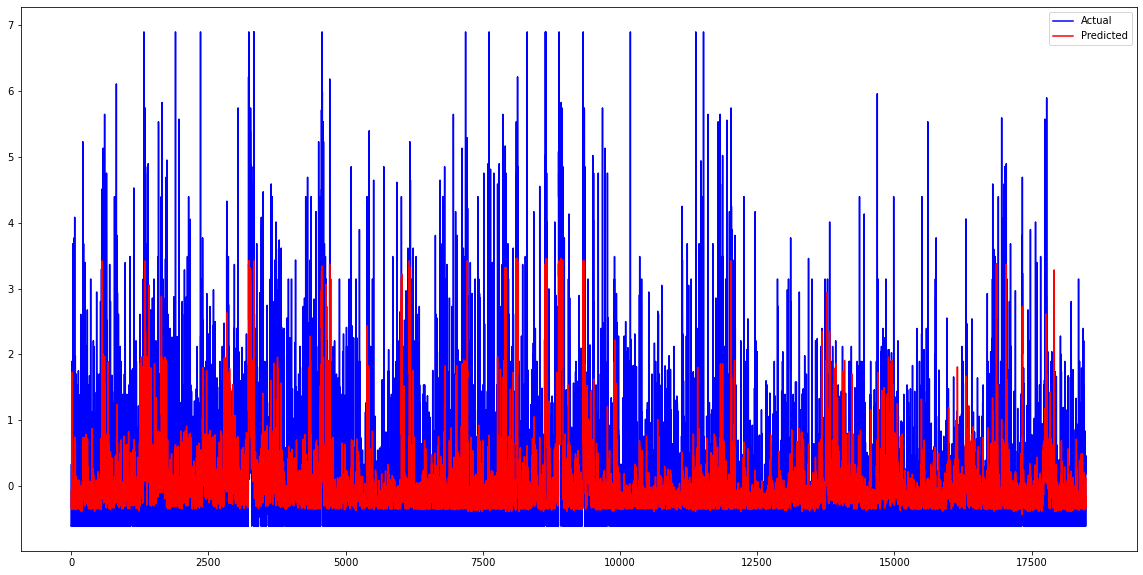

TRPTRANS_1_mean_norm_BE and NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

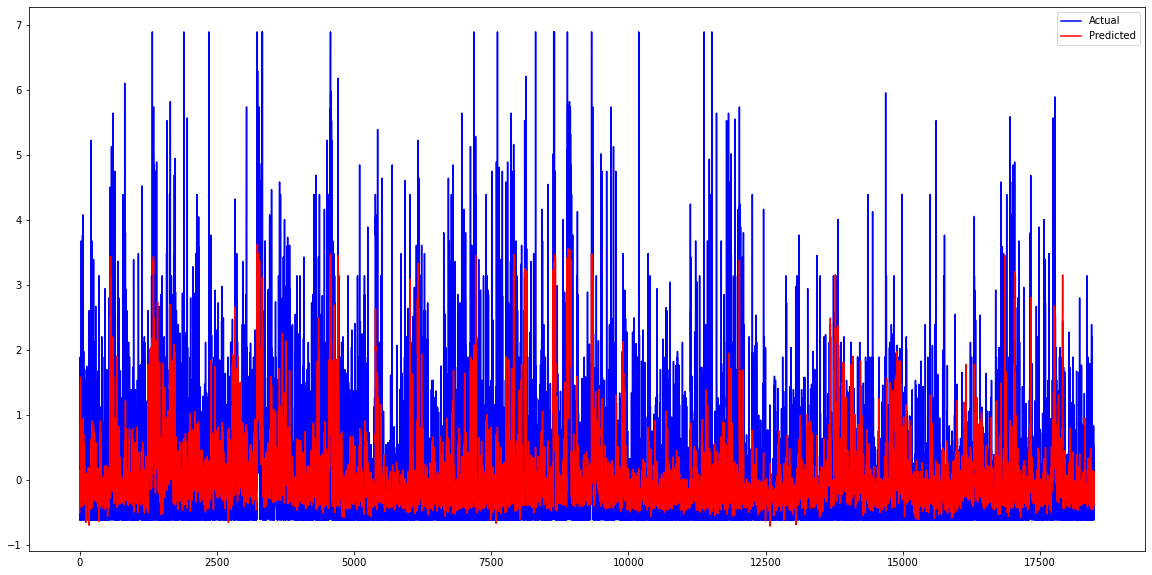

TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

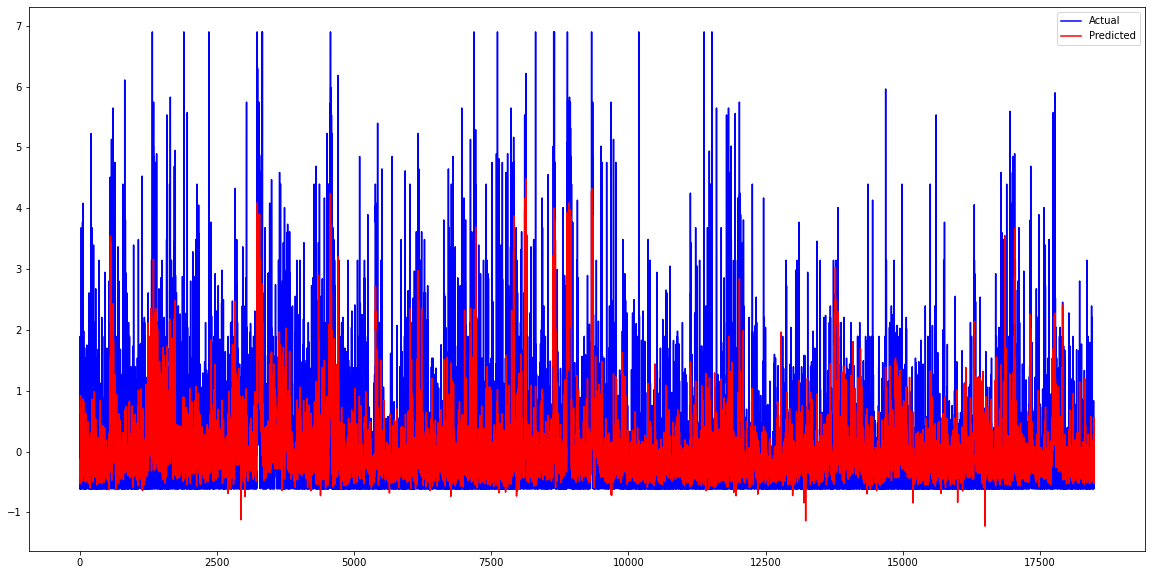

TRPTRANS_1_mean_norm_BE linear.pickle


<Figure size 432x288 with 0 Axes>

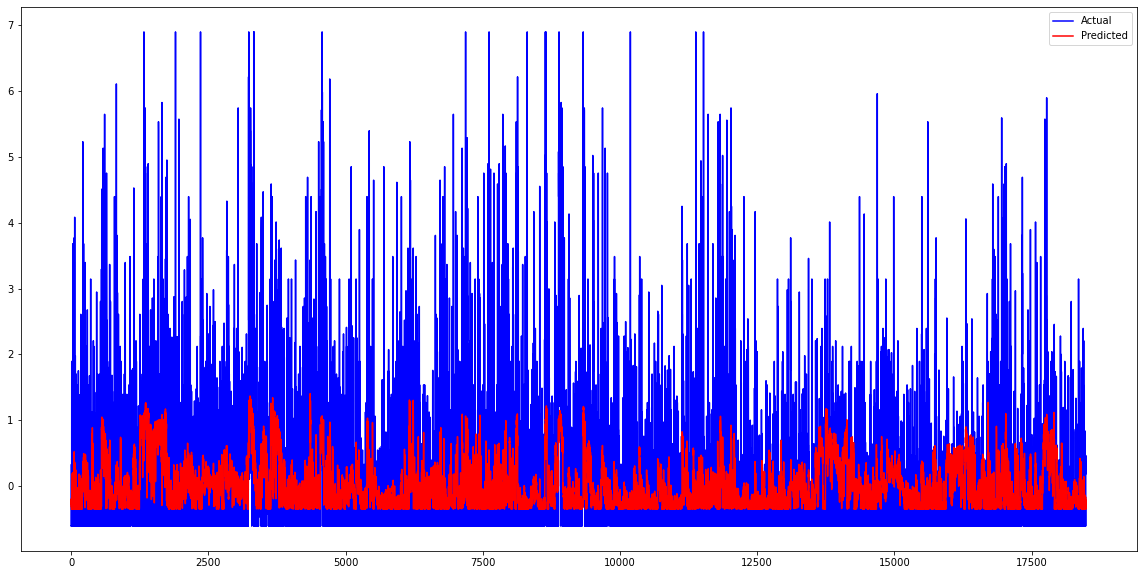

TRPTRANS_1_mean_norm_BE quadratic.pickle


<Figure size 432x288 with 0 Axes>

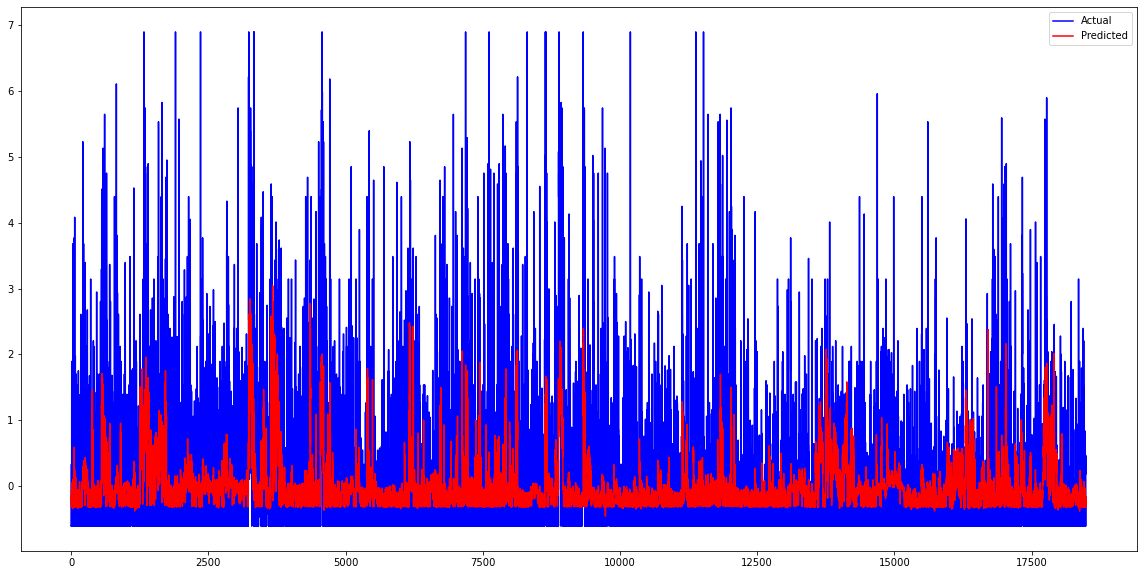

TRPTRANS_1_mean_norm_NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

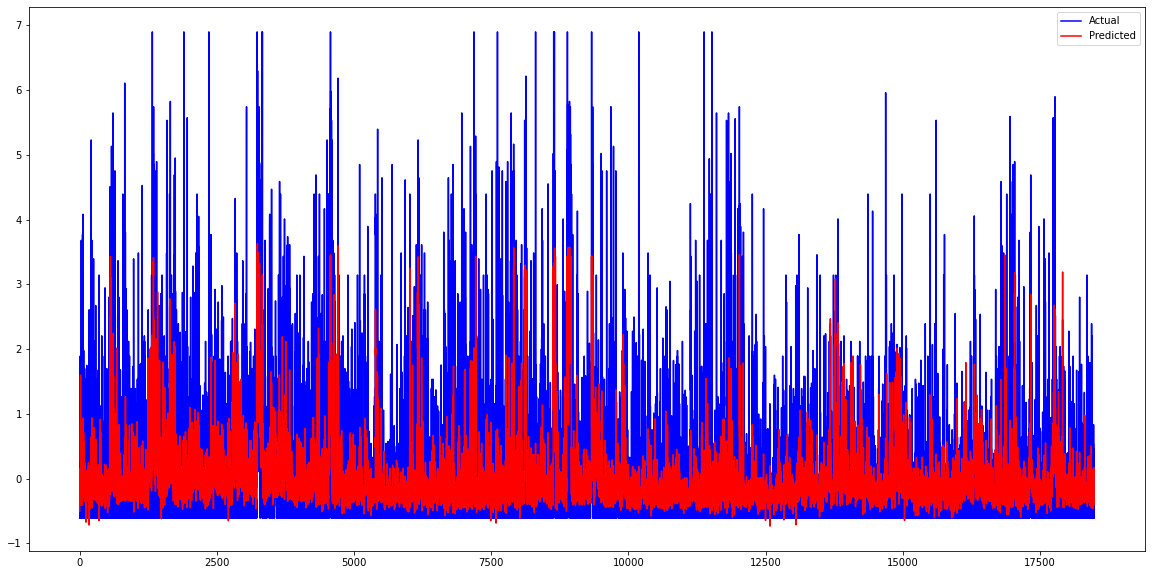

TRPTRANS_1_mean_norm_NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

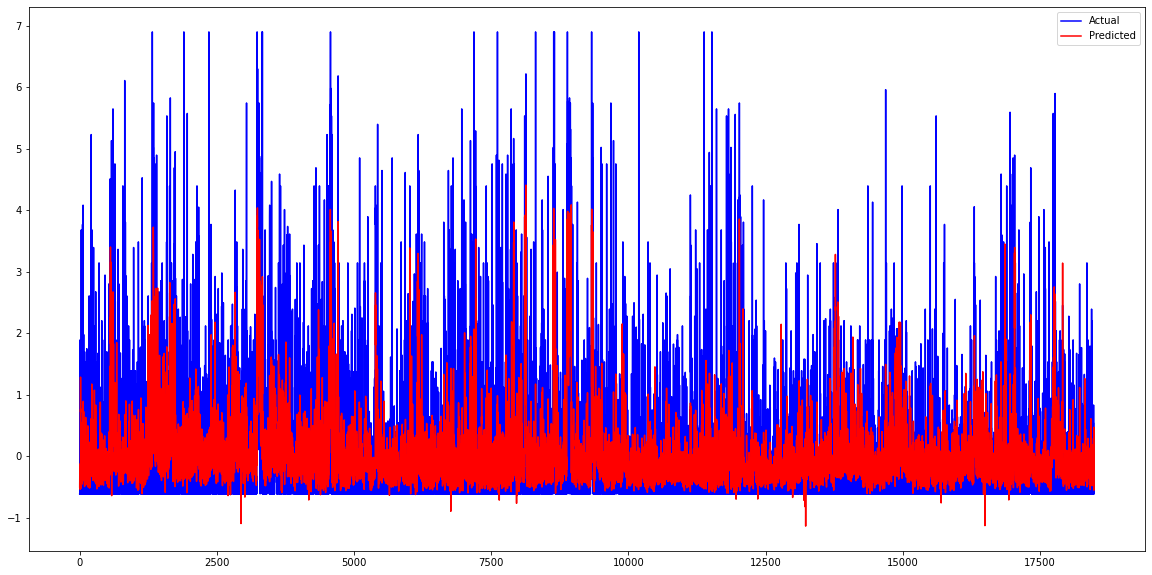

TRPTRANS_1_mean_norm_SD (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

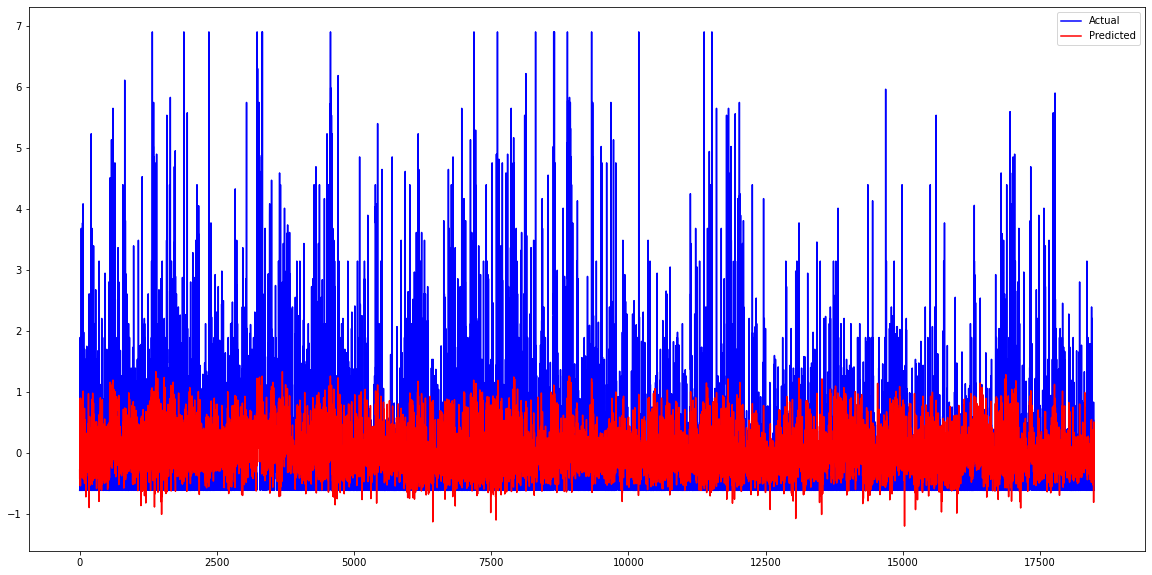

TRPTRANS_2_mean_norm_BE (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

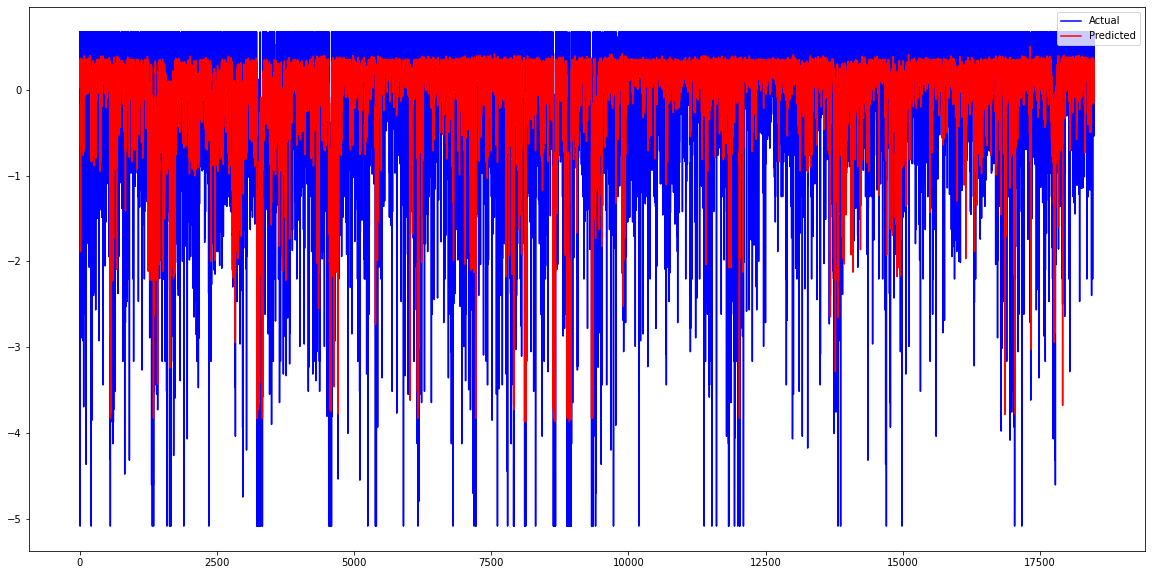

TRPTRANS_2_mean_norm_BE and NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

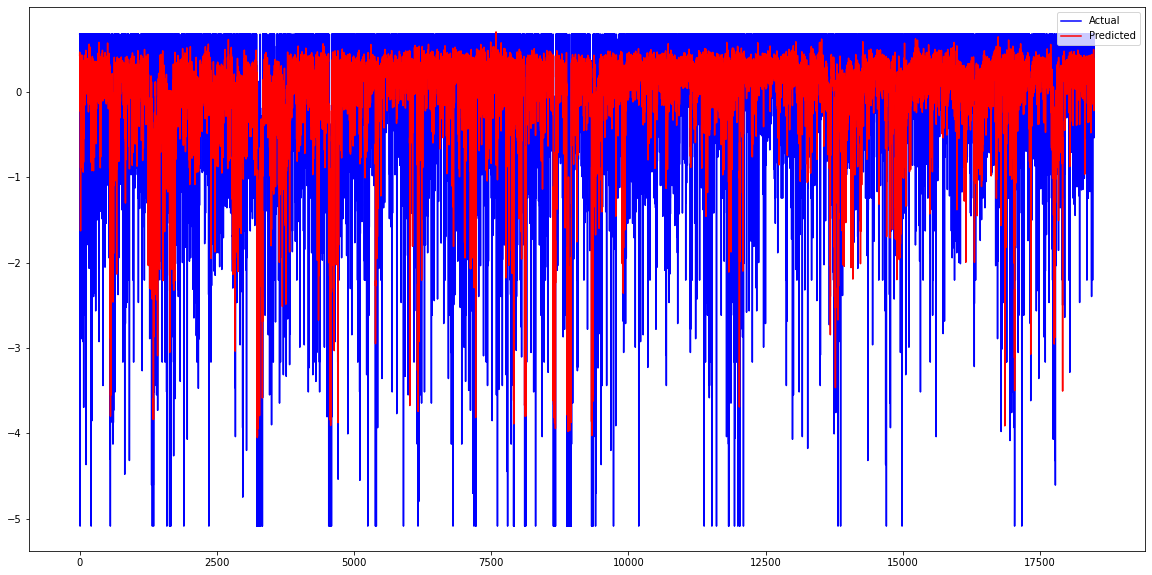

TRPTRANS_2_mean_norm_BE and NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

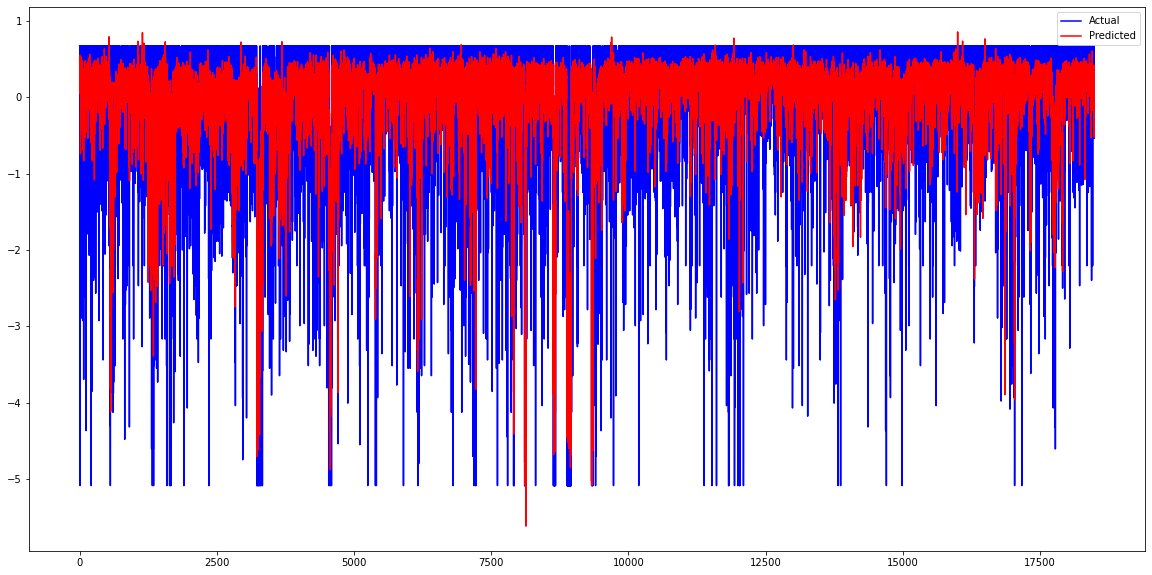

TRPTRANS_2_mean_norm_BE linear.pickle


<Figure size 432x288 with 0 Axes>

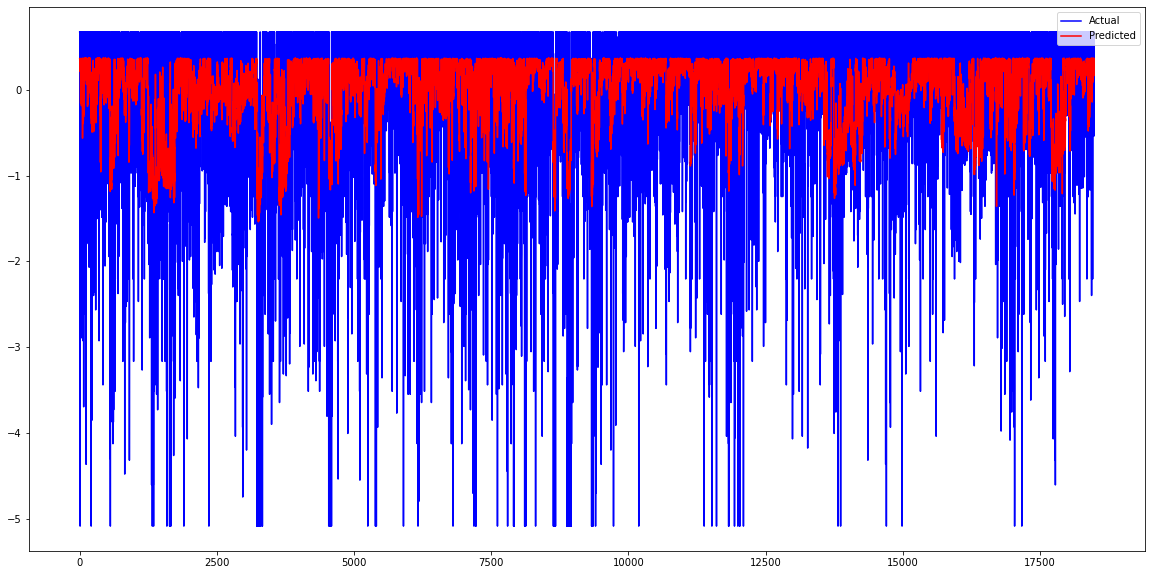

TRPTRANS_2_mean_norm_BE quadratic.pickle


<Figure size 432x288 with 0 Axes>

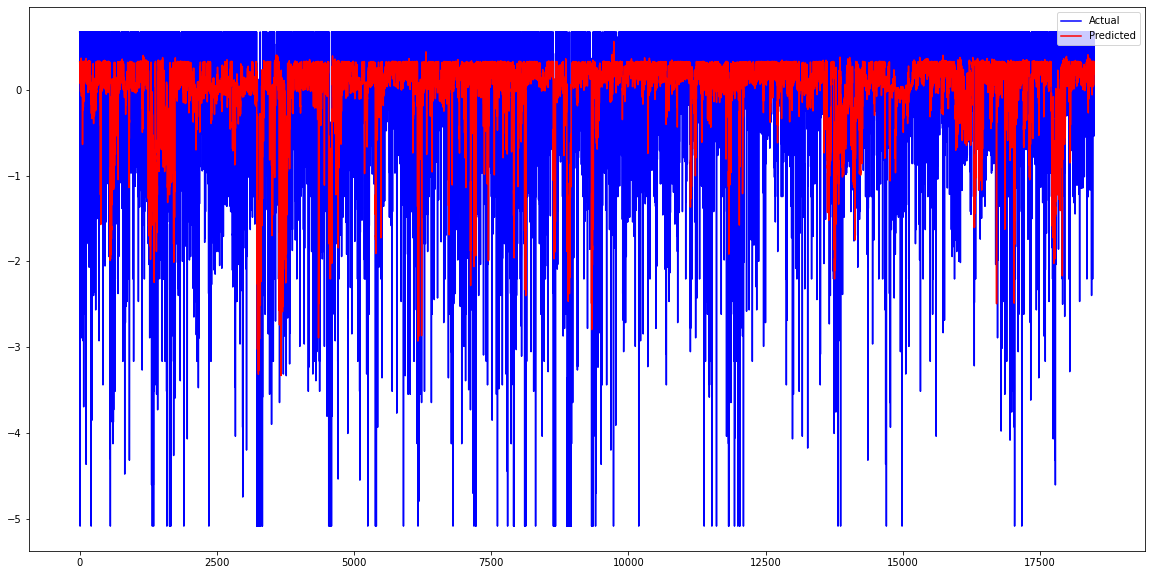

TRPTRANS_2_mean_norm_NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

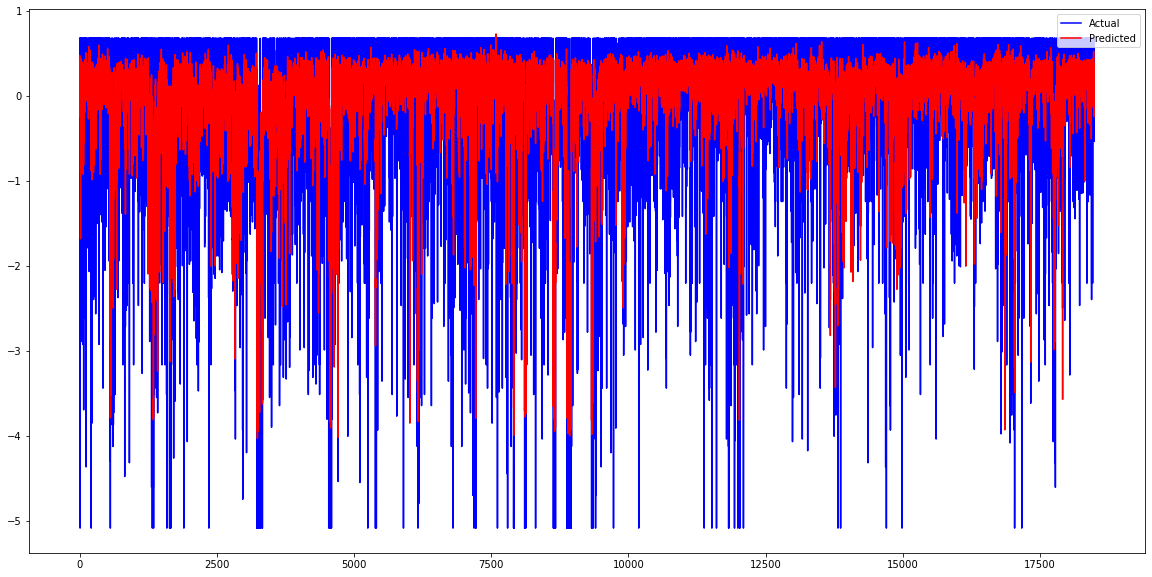

TRPTRANS_2_mean_norm_NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

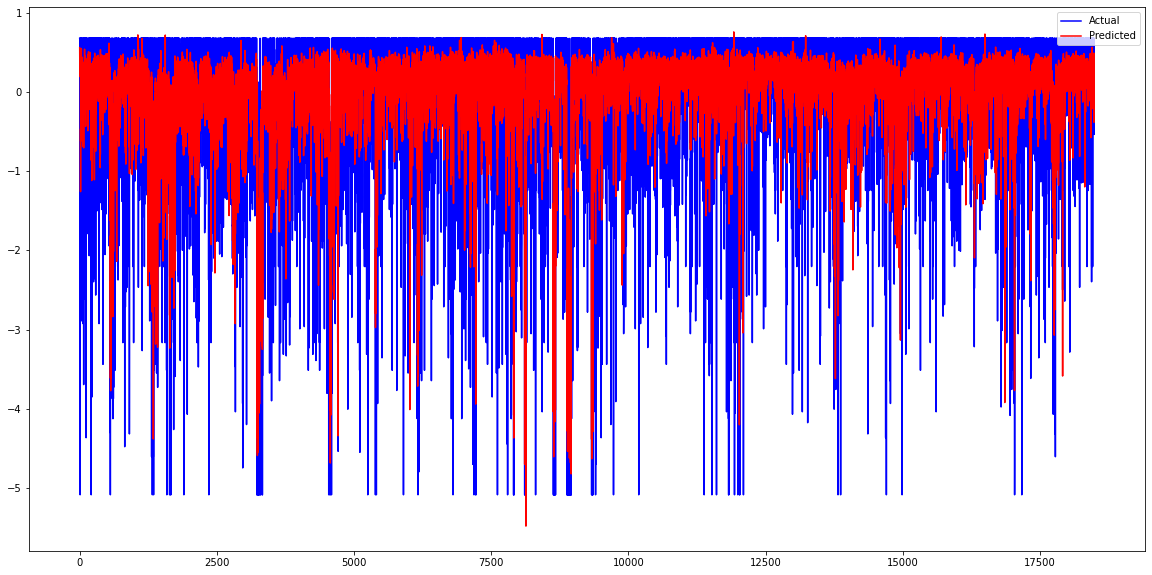

TRPTRANS_2_mean_norm_SD (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

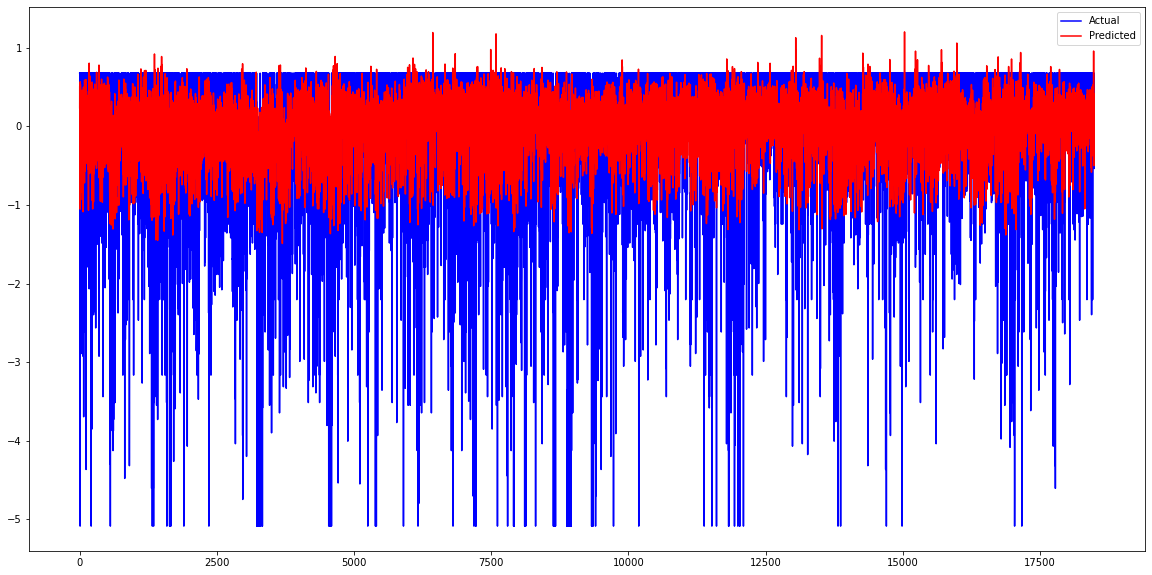

TRPTRANS_3_mean_norm_BE (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

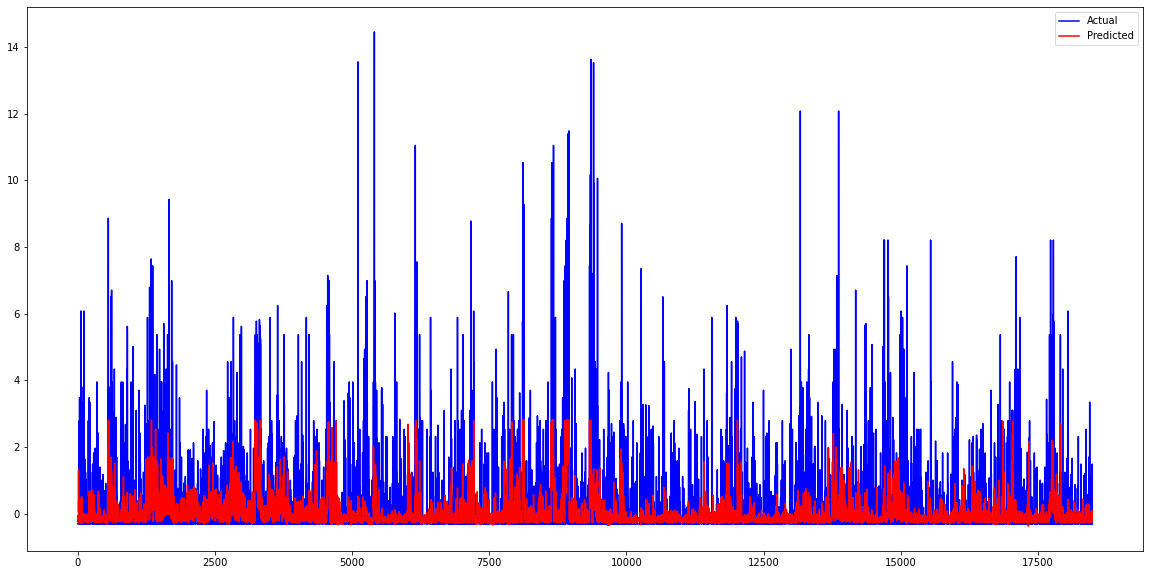

TRPTRANS_3_mean_norm_BE and NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

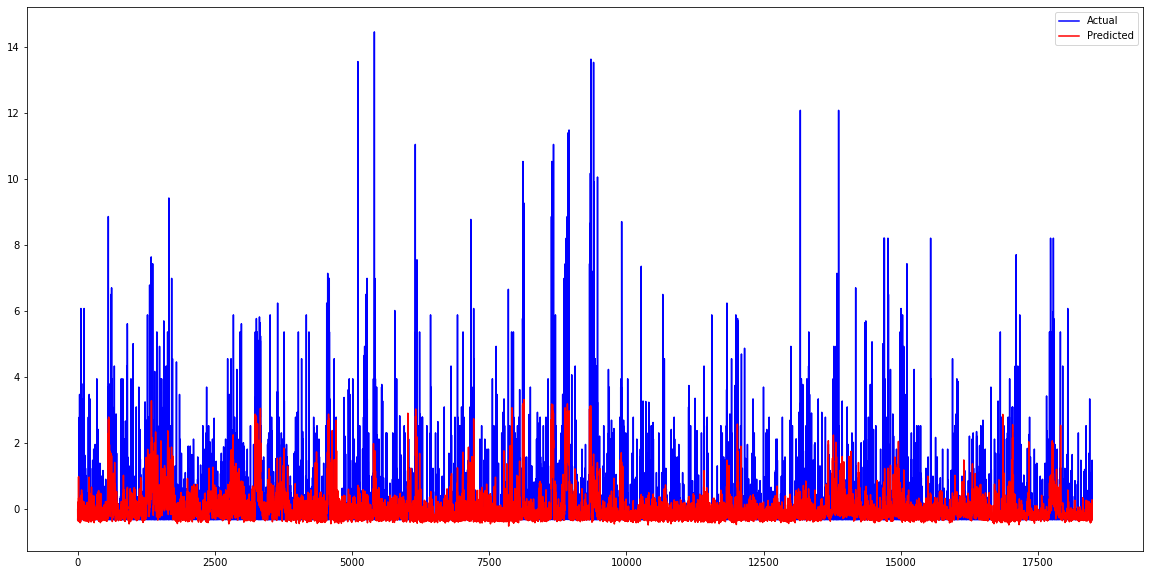

TRPTRANS_3_mean_norm_BE and NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

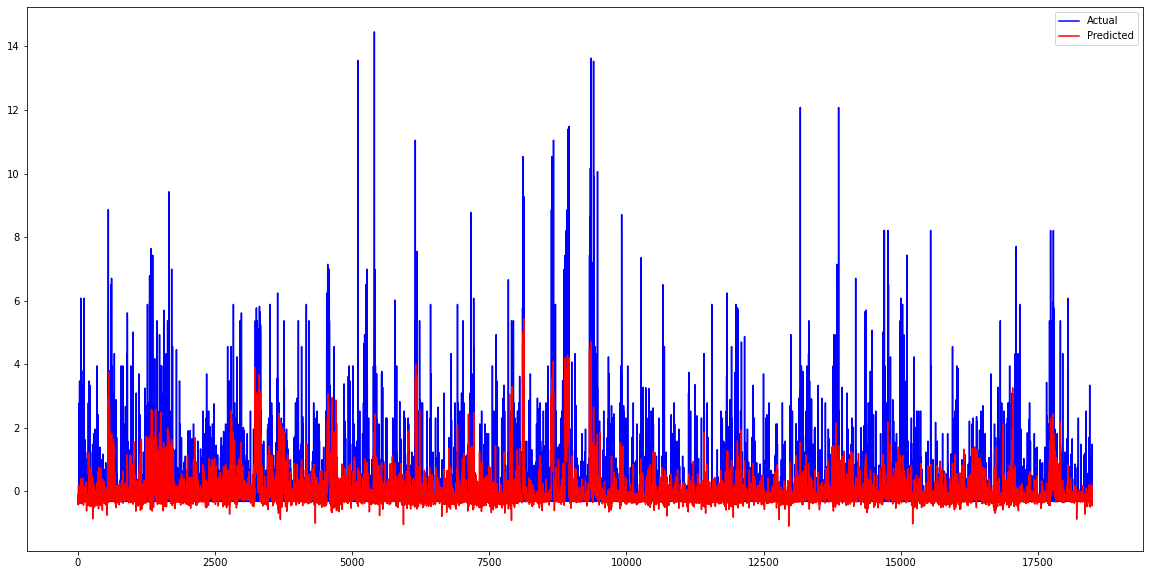

TRPTRANS_3_mean_norm_BE linear.pickle


<Figure size 432x288 with 0 Axes>

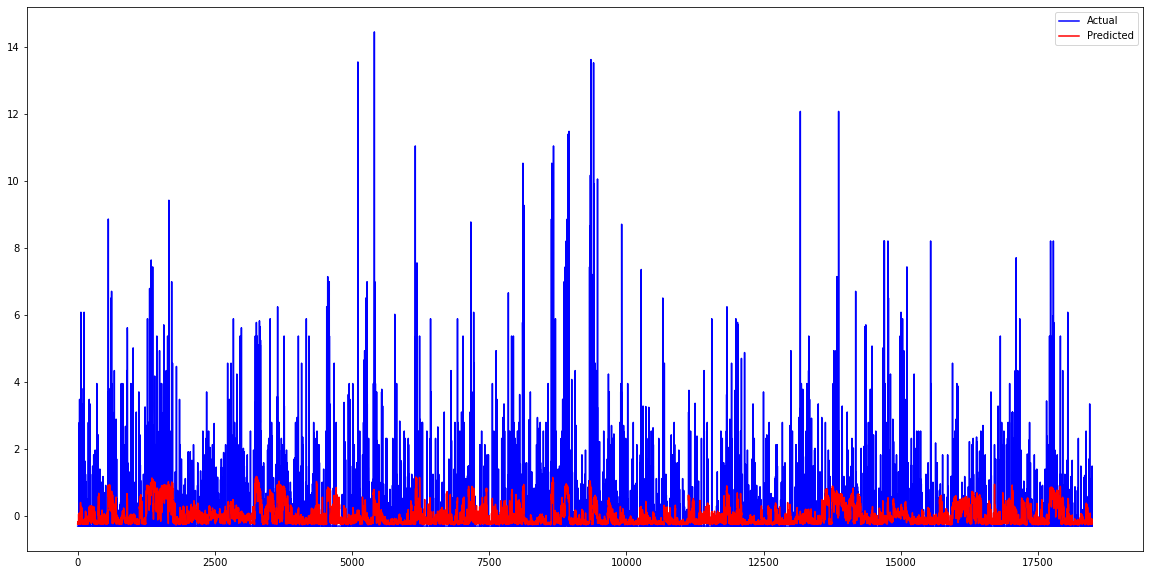

TRPTRANS_3_mean_norm_BE quadratic.pickle


<Figure size 432x288 with 0 Axes>

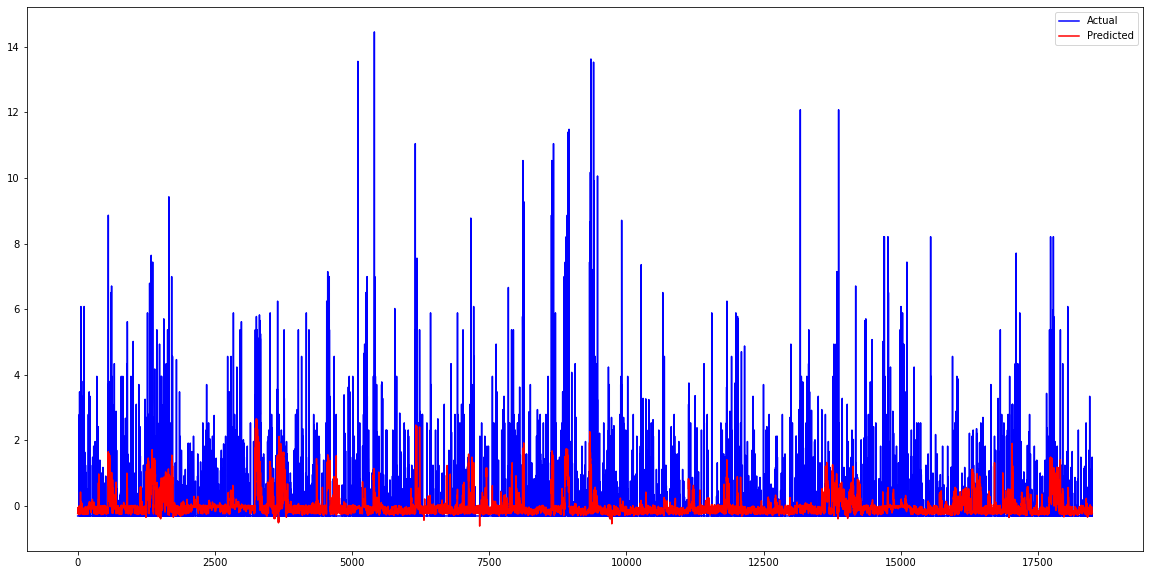

TRPTRANS_3_mean_norm_NHTS linear.pickle


<Figure size 432x288 with 0 Axes>

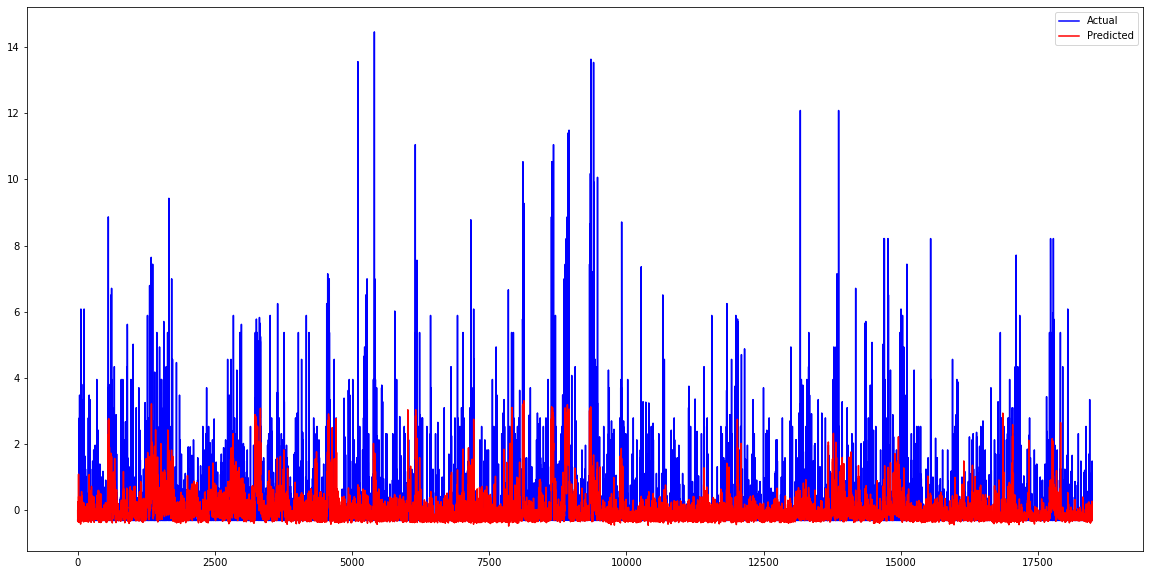

TRPTRANS_3_mean_norm_NHTS quadratic.pickle


<Figure size 432x288 with 0 Axes>

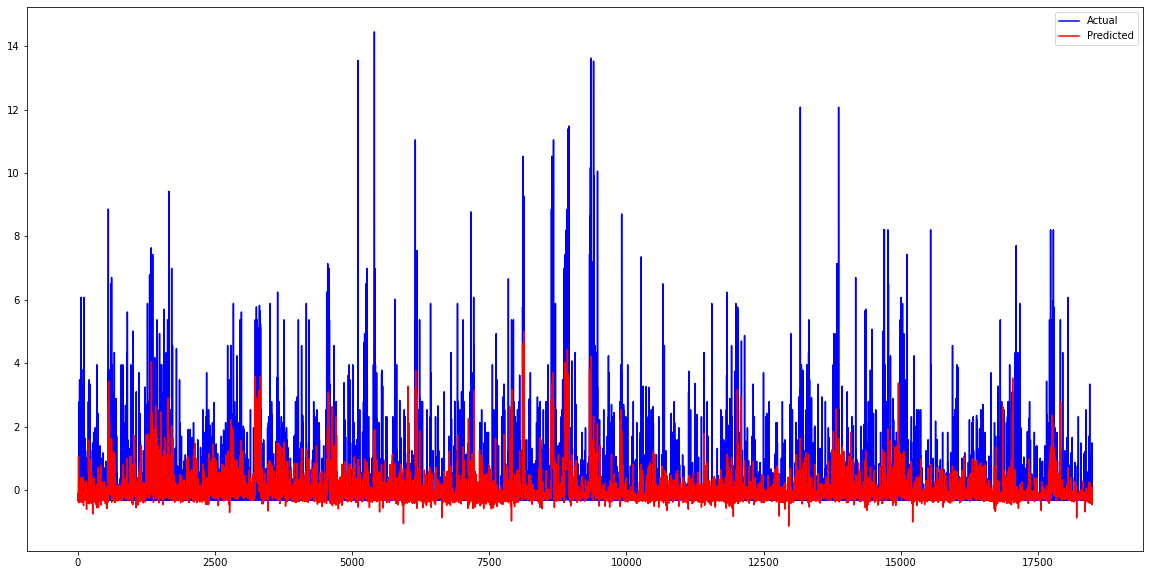

TRPTRANS_3_mean_norm_SD (NHTS) linear.pickle


<Figure size 432x288 with 0 Axes>

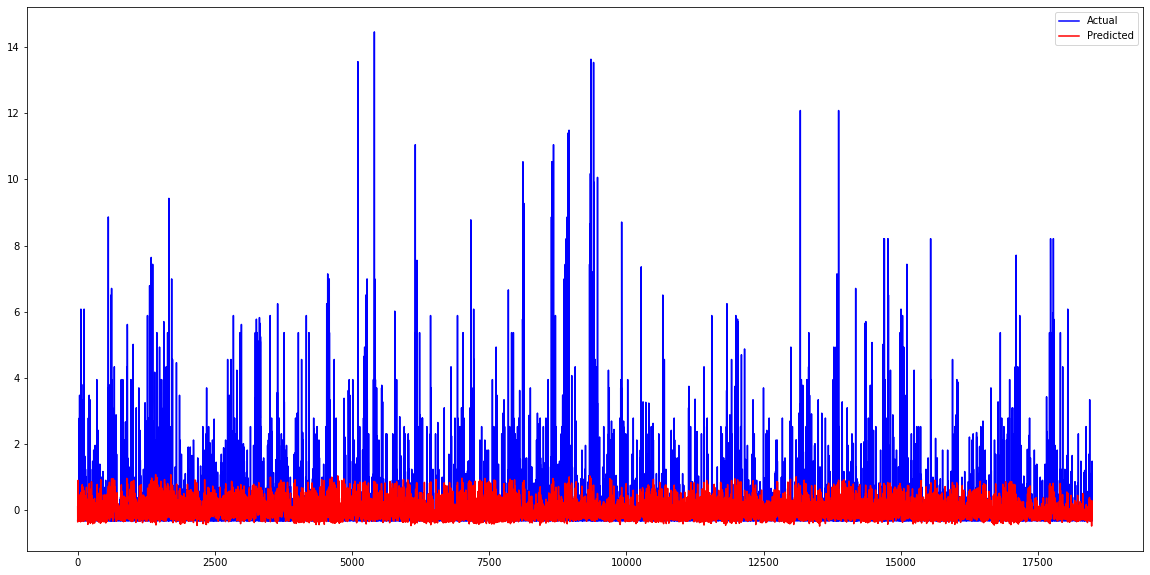

In [23]:
for plot in plots:
    model_path, original_indices, epsilons_sorted, y, y_predicted = plot
    print(model_path)
    plt.clf()
    plt.figure(figsize=(20,10))
    plt.plot(y, 'b', label="Actual")
    plt.plot(y_predicted, 'r', label="Predicted")
    plt.legend(loc="upper right")
    plt.show()

In [24]:
matplotlib.rcParams.update({"font.size": 14})
from sklearn.linear_model import LinearRegression

113 4001945002 -3.1723491473437946
HHVEHCNT_P_CAP_mean_norm_BE (NHTS) linear.pickle
[[1.         0.35437533]
 [0.35437533 1.        ]]
Scale HHVEHCNT_P_CAP_mean


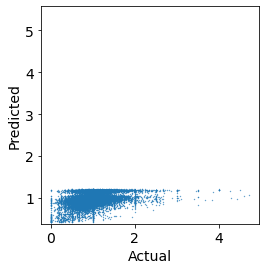

11362 38071957600 -3.050351432817817
HHVEHCNT_P_CAP_mean_norm_BE and NHTS linear.pickle
[[1.         0.57730071]
 [0.57730071 1.        ]]
Scale HHVEHCNT_P_CAP_mean


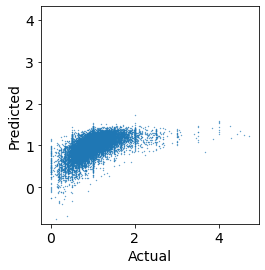

16734 49041975300 -3.2478123
HHVEHCNT_P_CAP_mean_norm_BE and NHTS quadratic.pickle
[[1.         0.61303041]
 [0.61303041 1.        ]]
Scale HHVEHCNT_P_CAP_mean


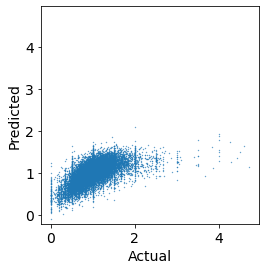

16734 49041975300 -2.97716474508439
HHVEHCNT_P_CAP_mean_norm_BE linear.pickle
[[1.         0.27869498]
 [0.27869498 1.        ]]
Scale HHVEHCNT_P_CAP_mean


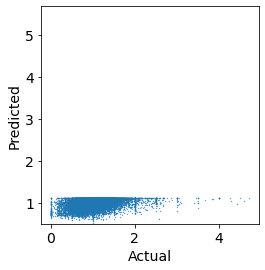

16734 49041975300 -3.0725842
HHVEHCNT_P_CAP_mean_norm_BE quadratic.pickle
[[1.         0.29397777]
 [0.29397777 1.        ]]
Scale HHVEHCNT_P_CAP_mean


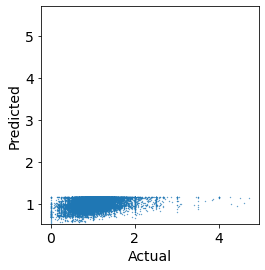

11362 38071957600 -3.045223809039521
HHVEHCNT_P_CAP_mean_norm_NHTS linear.pickle
[[1.         0.57603536]
 [0.57603536 1.        ]]
Scale HHVEHCNT_P_CAP_mean


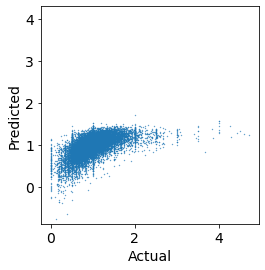

16734 49041975300 -3.1438582
HHVEHCNT_P_CAP_mean_norm_NHTS quadratic.pickle
[[1.         0.60926561]
 [0.60926561 1.        ]]
Scale HHVEHCNT_P_CAP_mean


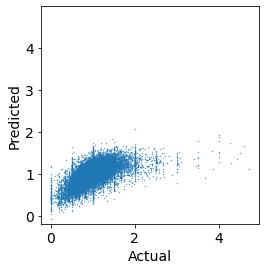

8933 36061016300 -3.1100038090803803
HHVEHCNT_P_CAP_mean_norm_SD (NHTS) linear.pickle
[[1.         0.50419905]
 [0.50419905 1.        ]]
Scale HHVEHCNT_P_CAP_mean


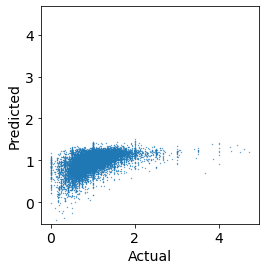

113 4001945002 -3.1053509257327994
HHVEHCNT_mean_norm_BE (NHTS) linear.pickle
[[1.         0.42061189]
 [0.42061189 1.        ]]
Scale HHVEHCNT_mean


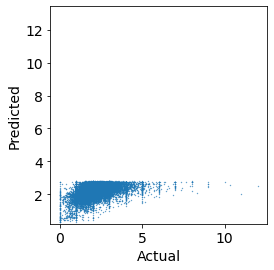

11934 42035030800 -4.242440052902284
HHVEHCNT_mean_norm_BE and NHTS linear.pickle
[[1.        0.5829242]
 [0.5829242 1.       ]]
Scale HHVEHCNT_mean


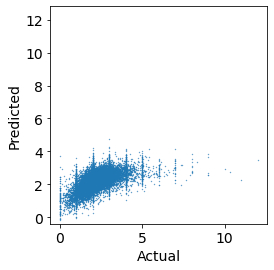

11934 42035030800 -4.3832903
HHVEHCNT_mean_norm_BE and NHTS quadratic.pickle
[[1.         0.61137804]
 [0.61137804 1.        ]]
Scale HHVEHCNT_mean


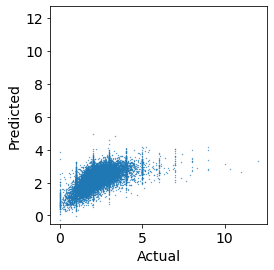

16734 49041975300 -2.900482769278658
HHVEHCNT_mean_norm_BE linear.pickle
[[1.         0.28997277]
 [0.28997277 1.        ]]
Scale HHVEHCNT_mean


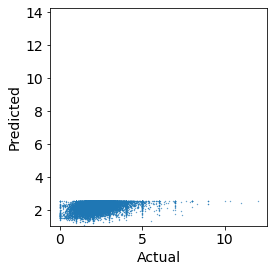

16734 49041975300 -2.9623287
HHVEHCNT_mean_norm_BE quadratic.pickle
[[1.         0.30479387]
 [0.30479387 1.        ]]
Scale HHVEHCNT_mean


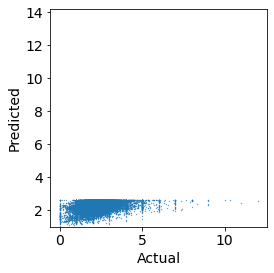

11934 42035030800 -4.265980782165373
HHVEHCNT_mean_norm_NHTS linear.pickle
[[1.         0.58133154]
 [0.58133154 1.        ]]
Scale HHVEHCNT_mean


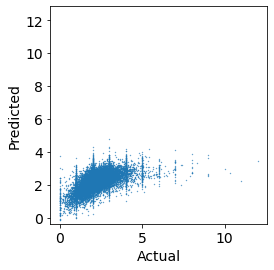

11934 42035030800 -4.371503
HHVEHCNT_mean_norm_NHTS quadratic.pickle
[[1.         0.60719353]
 [0.60719353 1.        ]]
Scale HHVEHCNT_mean


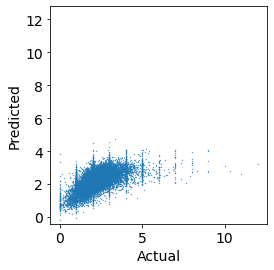

11934 42035030800 -4.184953108104174
HHVEHCNT_mean_norm_SD (NHTS) linear.pickle
[[1.         0.51707655]
 [0.51707655 1.        ]]
Scale HHVEHCNT_mean


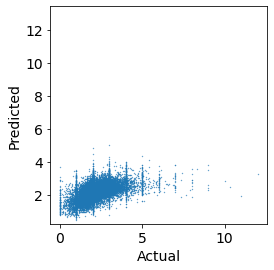

1344 6037211910 -4.030734449496341
TRPTRANS_1_mean_norm_BE (NHTS) linear.pickle
[[1.         0.49959518]
 [0.49959518 1.        ]]
Scale TRPTRANS_1_mean


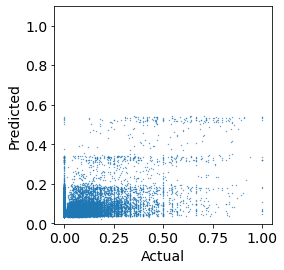

1343 6037207501 -3.8427776390245683
TRPTRANS_1_mean_norm_BE and NHTS linear.pickle
[[1.         0.51211577]
 [0.51211577 1.        ]]
Scale TRPTRANS_1_mean


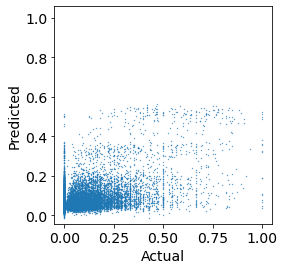

8948 36061021600 -4.2535
TRPTRANS_1_mean_norm_BE and NHTS quadratic.pickle
[[1.         0.54343494]
 [0.54343494 1.        ]]
Scale TRPTRANS_1_mean


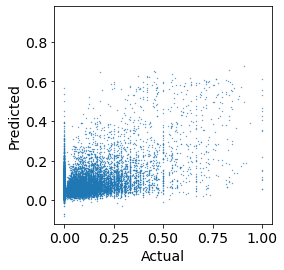

4358 8031003201 -1.9062535841721042
TRPTRANS_1_mean_norm_BE linear.pickle
[[1.        0.3514991]
 [0.3514991 1.       ]]
Scale TRPTRANS_1_mean


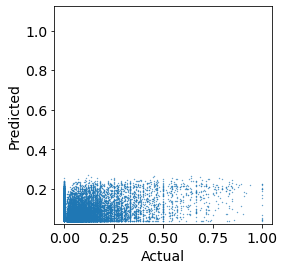

3675 6085504311 -3.110958
TRPTRANS_1_mean_norm_BE quadratic.pickle
[[1.        0.3875034]
 [0.3875034 1.       ]]
Scale TRPTRANS_1_mean


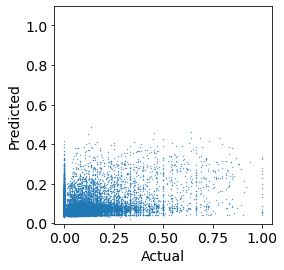

1343 6037207501 -3.8092969153893614
TRPTRANS_1_mean_norm_NHTS linear.pickle
[[1.         0.51090653]
 [0.51090653 1.        ]]
Scale TRPTRANS_1_mean


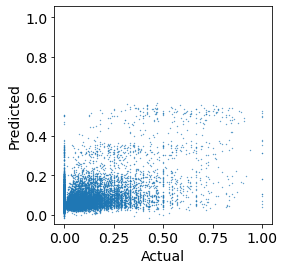

8948 36061021600 -4.5122933
TRPTRANS_1_mean_norm_NHTS quadratic.pickle
[[1.         0.53462959]
 [0.53462959 1.        ]]
Scale TRPTRANS_1_mean


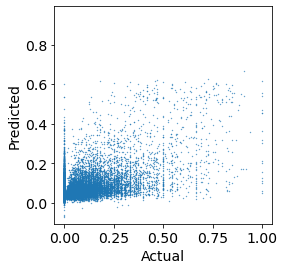

1388 6037265520 -1.9447092767484024
TRPTRANS_1_mean_norm_SD (NHTS) linear.pickle
[[1.         0.31575083]
 [0.31575083 1.        ]]
Scale TRPTRANS_1_mean


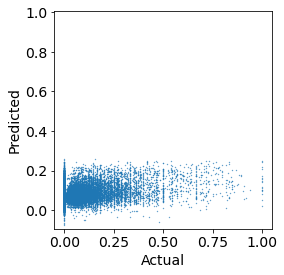

11934 42035030800 -5.438774097256601
TRPTRANS_2_mean_norm_BE (NHTS) linear.pickle
[[1.         0.56110279]
 [0.56110279 1.        ]]
Scale TRPTRANS_2_mean


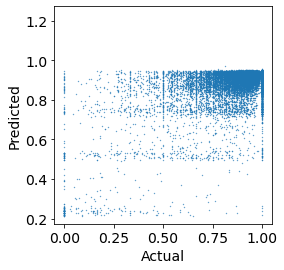

11934 42035030800 -5.555591792426706
TRPTRANS_2_mean_norm_BE and NHTS linear.pickle
[[1.         0.57370475]
 [0.57370475 1.        ]]
Scale TRPTRANS_2_mean


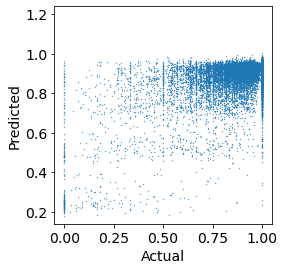

1899 6053010101 -5.441747
TRPTRANS_2_mean_norm_BE and NHTS quadratic.pickle
[[1.         0.60830392]
 [0.60830392 1.        ]]
Scale TRPTRANS_2_mean


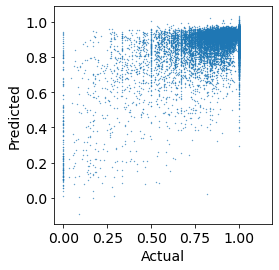

2355 6065044606 -5.450027485361482
TRPTRANS_2_mean_norm_BE linear.pickle
[[1.        0.3912383]
 [0.3912383 1.       ]]
Scale TRPTRANS_2_mean


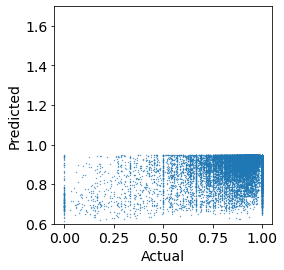

2355 6065044606 -5.4138536
TRPTRANS_2_mean_norm_BE quadratic.pickle
[[1.         0.43550939]
 [0.43550939 1.        ]]
Scale TRPTRANS_2_mean


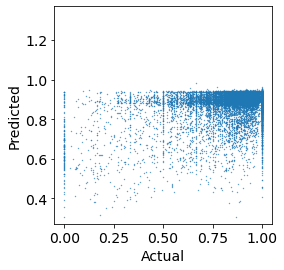

11934 42035030800 -5.5728974840699745
TRPTRANS_2_mean_norm_NHTS linear.pickle
[[1.         0.57197357]
 [0.57197357 1.        ]]
Scale TRPTRANS_2_mean


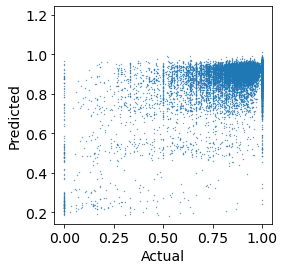

11606 40109100200 -5.4133015
TRPTRANS_2_mean_norm_NHTS quadratic.pickle
[[1.         0.59597871]
 [0.59597871 1.        ]]
Scale TRPTRANS_2_mean


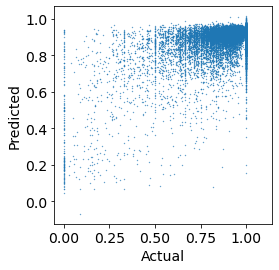

11934 42035030800 -5.81865773148119
TRPTRANS_2_mean_norm_SD (NHTS) linear.pickle
[[1.         0.34951675]
 [0.34951675 1.        ]]
Scale TRPTRANS_2_mean


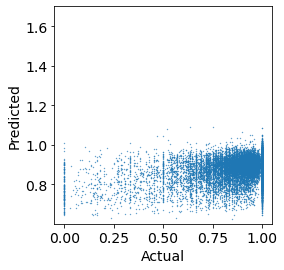

8656 36047037402 -3.132336522247687
TRPTRANS_3_mean_norm_BE (NHTS) linear.pickle
[[1.        0.4199701]
 [0.4199701 1.       ]]
Scale TRPTRANS_3_mean


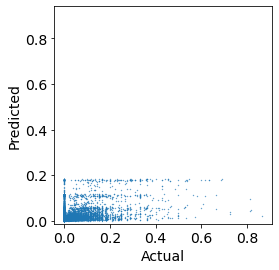

8133 36005040302 -3.630901286683855
TRPTRANS_3_mean_norm_BE and NHTS linear.pickle
[[1.         0.44316286]
 [0.44316286 1.        ]]
Scale TRPTRANS_3_mean


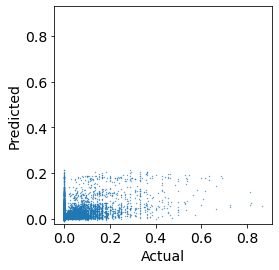

8133 36005040302 -5.7428646
TRPTRANS_3_mean_norm_BE and NHTS quadratic.pickle
[[1.         0.49474261]
 [0.49474261 1.        ]]
Scale TRPTRANS_3_mean


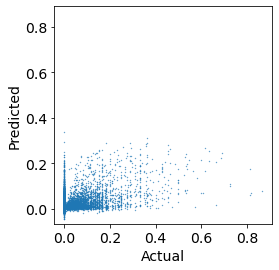

6162 17031051000 -1.4681920733274298
TRPTRANS_3_mean_norm_BE linear.pickle
[[1.         0.28964601]
 [0.28964601 1.        ]]
Scale TRPTRANS_3_mean


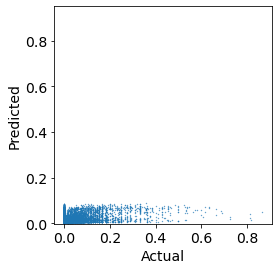

6162 17031051000 -2.7752826
TRPTRANS_3_mean_norm_BE quadratic.pickle
[[1.         0.32613307]
 [0.32613307 1.        ]]
Scale TRPTRANS_3_mean


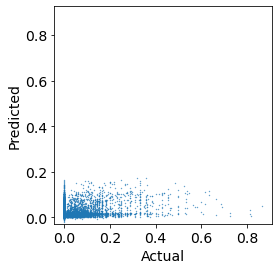

8133 36005040302 -3.6183667622176667
TRPTRANS_3_mean_norm_NHTS linear.pickle
[[1.         0.44056385]
 [0.44056385 1.        ]]
Scale TRPTRANS_3_mean


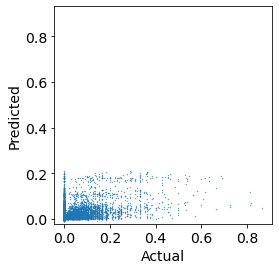

8133 36005040302 -5.321458
TRPTRANS_3_mean_norm_NHTS quadratic.pickle
[[1.         0.47359811]
 [0.47359811 1.        ]]
Scale TRPTRANS_3_mean


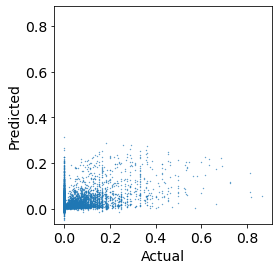

1421 6037276604 -1.3906406028862988
TRPTRANS_3_mean_norm_SD (NHTS) linear.pickle
[[1.         0.26148081]
 [0.26148081 1.        ]]
Scale TRPTRANS_3_mean


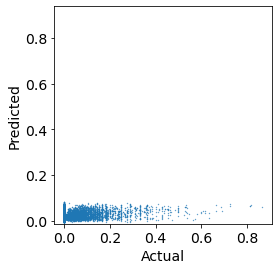

In [25]:
#Scatter plots with scale
for plot in plots:
    model_path, original_indices, epsilons_sorted, y, y_predicted = plot
    print(original_indices[0], index_to_census_id[original_indices[0]], epsilons_sorted[0])
    print(model_path)
    print(np.corrcoef(y, y_predicted))
    
    helper = model_path.split("_")
    scale_var = "_".join(helper[:-2])
    input_structure = helper[-1].split(".")[0]
    print("Scale", scale_var)
    scaler = StandardScaler()
    scaler.fit(df[scale_var].values.reshape(-1,1)) # name needs to match the following output_var
#     min_ = min(min(y),min(y_predicted))
#     max_ = max(max(y),max(y_predicted))
    
    plt.clf()
    PATH = "../scatter_plot_outputs/" + "scatter_scaled_" + model_path + ".png" 
    
    plt.scatter(scaler.inverse_transform(y), scaler.inverse_transform(y_predicted), s = 0.1)
    #plt.plot(y, np.poly1d(np.polyfit(y,y_predicted,1))(y))
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.axis("square")
   
    plt.savefig(PATH, bbox_inches = 'tight')
    
    plt.show()